<a href="https://colab.research.google.com/github/zd341/Author-Authentication/blob/main/Authorship_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTHORSHIP AUTHENTICATION

Authorship Analysis is a branch of NLP that aims to identify the writer of a unknown text sample based on a  set of irrefutable documents written by a list of suspected authors. 

Author identification can be solved using supervised learning where the problem is expressed as multi-class text classication problem.

The main aim is for this research to evaluate the performance of deep learning and machine learning methods of text classication methods for authorship authenitcation.

* The first segment of this notebook contains the data pre-processing pipeline where unstructured data (text data) is processed into hetergenous data and some features are derived for the exploration of the data.

* The second segment of this notebook contains the machine learning implementation of authorship authentication.

* The third section of this notebook contains the deep learning implementation of authorship authentication.

# Configuring Google Drive and Checking GPU Collab Notebook

### Python Version Check 

In [1]:
!python --version

Python 3.7.12


### Checking GPU Availability & Addtional Info


In [2]:

# Check whether GPU is working
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# Check which GPU is available
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  

Found GPU at: /device:GPU:0
Fri Oct  1 20:30:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    33W / 250W |    345MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

### Accessing Google Drive

In [3]:
# Access Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# DATA UNDERSTANDING PHASE- PHILOSOPHERS TEXT

### Loading In each of the books per Philosopher

In [32]:

# Isolate Hume Corpus
with open('/content/drive/MyDrive/data/hume.txt', 'r', encoding='utf-8') as f:
  hume_corpus = f.read()
# Isolate Kant Corpus
with open('/content/drive/MyDrive/data/kant.txt', 'r', encoding='utf-8') as f:
  kant_corpus = f.read()
# Isolate Nietzsche Corpus
with open('/content/drive/MyDrive/data/nietzsche.txt', 'r', encoding='utf-8') as f:
  nietzsche_corpus = f.read()
# Isolate Aristotle Corpus
with open('/content/drive/MyDrive/data/aristotle.txt', 'r', encoding='utf-8') as f:
  aristotle_corpus = f.read()
# Isolate Plato Corpus
with open('/content/drive/MyDrive/data/plato.txt', 'r', encoding='utf-8') as f:
  plato_corpus = (f.read())



### Checking the first 50 lines of each book

In [5]:

# Print 50 lines from each book 

print(hume_corpus[0:50])
print(kant_corpus[0:50])
print(nietzsche_corpus[0:50])
print(aristotle_corpus[0:50])
print(plato_corpus[0:50])


﻿THE victory which the earl of Richmond gained at 
﻿We may call the faculty of cognition from princip
﻿What I am now going to relate is the history of t
﻿Things are said to be named 'equivocally' when, t
﻿SOCRATES: My dear Phaedrus, whence come you, and 


## Load Text Processing Libraries

In [33]:

# Load necessary NLP libraries
import nltk
import re
import string
import spacy
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)
nlp = spacy.load("en_core_web_sm")
sw = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Define Cleaner Functions for Unstructured Texts

In [34]:

# First text cleaner

def lowerCase_clean(string):
  string = re.sub("Part","",string)
  string = string.lower()
  return re.sub("\n"," ",string)

# Lemmatize Cleaning of text

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# General Cleaning of text

def clean_up(text):
    text = text.replace(' ', ' ')
    text = text.replace('–', '-')
    text = text.replace('\n', ' ')
    text = re.sub(r'[IVXLCDM]+\.', '', text)
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub(r':', '', text)
    text = re.sub(r'\((.*?)\)', '', text)
    text = re.sub(r'\{(.*?)\}', '', text)
    text = re.sub(r'\b[A-Z]{2,}\b', '', text)
    text = text.replace(' ,', ',')
    text = text.replace(' .', '.')
    text = text.replace(' ;', ';')
    text = re.sub(r'[^A-Za-z0-9äÄöÖüÜß\s\.\-\!\?\:\;\,]', '', text)
    text = re.sub(r' +', ' ', text)
    return text

# Remove punctuation

def remove_punct(text):
  table = str.maketrans("","", string.punctuation)
  return text.translate(table)

# Removing stopwords

def remove_stop_words(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw ]

  return " ".join(text)

# clean plato corpus
def clean_Plato_corp(word):
  word = re.sub("gutenbergtm","",word)
  word = re.sub("project","",word)
  word = re.sub("electronic","",word)
  word = re.sub("gutenberg","",word)
  word = re.sub("literary","",word)
  word = re.sub("archive","",word)
  word = re.sub("foundation","",word)
  return word

# clean Hume corpus

def clean_Hume_corp(word):
  word = re.sub('vol',"",word)
  word = re.sub('chap',"",word)
  word = re.sub('p',"",word)
  word = re.sub('ii',"",word)
  word = re.sub(r'\n{4}vol.*\n+', '\n\n', word)
  word = re.sub(r'\n{4}part.*\n+', '\n\n', word)
  word = re.sub(r'\n{1}p.*\n+', '\n\n', word)
  word = re.sub(r'\n{2}vi.*\n+', '\n\n', word)
  word = re.sub(r'\n{2}v.*\n+', '\n\n', word)
  return word
 

## Clean Corpus For Each Author

In [35]:

# 1. Cleaning Kant Text

kant_corpus = clean_up(kant_corpus)

kant_corpus = remove_stop_words(kant_corpus)

kant_corpus = lemmatize_words(kant_corpus)


# 2. Cleaning Aristotle Text

aristotle_corpus = clean_up(aristotle_corpus) 

aristotle_corpus = remove_stop_words(aristotle_corpus)

aristotle_corpus = lemmatize_words(aristotle_corpus)


# 3. Cleaning Hume Text

hume_corpus = clean_up(hume_corpus) 

hume_corpus = remove_stop_words(hume_corpus) 

hume_corpus = lemmatize_words(hume_corpus) 

hume_corpus = clean_Hume_corp(hume_corpus)

# 4. Cleaning Plato Text

plato_corpus = clean_up(plato_corpus) 

plato_corpus = remove_stop_words(plato_corpus) 

plato_corpus = lemmatize_words(plato_corpus) 

plato_corpus= clean_Plato_corp(plato_corpus)

# 5. Cleaning Nietzsche Text

nietzsche_corpus = clean_up(nietzsche_corpus) 

nietzsche_corpus = remove_stop_words(nietzsche_corpus) 

nietzsche_corpus = lemmatize_words(nietzsche_corpus) 


### Tokenizing Corpus Into Words and Sentences

In [36]:

# Importing Tokenizing Libraries 

from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Seperate cleaning process to generate insightful bi-grams
clean_kant_corpus = remove_punct(kant_corpus)
clean_aristotle_corpus = remove_punct(aristotle_corpus)
clean_hume_corpus =  remove_punct(hume_corpus)
clean_nietzsche_corpus = remove_punct(nietzsche_corpus)
clean_plato_corpus = remove_punct(plato_corpus)

#1. Generate sentences and tokens for aristotle_corpus
aristotle_sents = aristotle_corpus.split(sep=".")
aristotle_tokens = word_tokenize(clean_aristotle_corpus,language='english')

#2. Generate sentences and tokens for hume
hume_sents = hume_corpus.split(sep=".")
hume_tokens = word_tokenize(clean_hume_corpus,language='english')

#3. Generate sentences and tokens for nietzsche
nietzsche_sents = nietzsche_corpus.split(sep=".")
nietzsche_tokens = word_tokenize(nietzsche_corpus,language='english')

#4. Generate sentences and tokens for kant
kant_sents = kant_corpus.split(sep=".")
kant_tokens = word_tokenize(clean_kant_corpus,language='english')

#5. Generate sentences and tokens for plato
# plato_sents = sent_tokenize(plato_corpus,language='english')
plato_sents = plato_corpus.split(sep=".")
plato_tokens = word_tokenize(clean_plato_corpus,language='english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Checking the Length of Each Corpus

In [37]:



print(f"The number of tokens in the Aristotle corpus is: {str(len(aristotle_corpus))}")
print(f"The number of tokens in the Hume corpus is: {str(len(hume_corpus))}")
print(f"The number of tokens in the Kant corpus is: {str(len(kant_corpus))}")
print(f"The number of tokens in the Plato corpus is: {str(len(plato_corpus))}")
print(f"The number of tokens in the Nietzsche corpus is: {str(len(nietzsche_corpus))}")

print("\t")

print(f"The number of sentences in the Aristotle corpus is: {str(len(aristotle_sents))}")
print(f"The number of sentences in the Hume corpus is: {str(len(hume_sents))}")
print(f"The number of sentences in the Nietzsche corpus is: {str(len(nietzsche_sents))}")
print(f"The number of sentences in the Plato corpus is: {str(len(plato_sents))}")
print(f"The number of sentences in the Kant corpus is: {str(len(kant_sents))}")


The number of tokens in the Aristotle corpus is: 1202618
The number of tokens in the Hume corpus is: 6175538
The number of tokens in the Kant corpus is: 1952451
The number of tokens in the Plato corpus is: 1949054
The number of tokens in the Nietzsche corpus is: 2136723
	
The number of sentences in the Aristotle corpus is: 12034
The number of sentences in the Hume corpus is: 59353
The number of sentences in the Nietzsche corpus is: 20551
The number of sentences in the Plato corpus is: 18130
The number of sentences in the Kant corpus is: 15183


## Generate Dataframe

In [38]:

# Create Data Frames for each set of sentences
import pandas as pd
aris = pd.DataFrame({'label':0, 'author':'Aristotle','sentence': aristotle_sents})
niet = pd.DataFrame({'label':1, 'author':'Nietzsche','sentence': nietzsche_sents})
kant = pd.DataFrame({'label':2,'author':'Kant','sentence':kant_sents})
Plat = pd.DataFrame({'label':3,'author':'Plato','sentence':plato_sents})
Hum  = pd.DataFrame({'label':4,'author':'Hume','sentence':hume_sents})
# Make a list of lists
frames = [aris,niet,kant,Plat,Hum]
# Concatenante frames into a single dataframe
philo = pd.concat(frames)

philo.head()


,label,author,sentence
0,0,Aristotle,"thing said named equivocally when, though comm..."
1,0,Aristotle,"thus, real man figure picture lay claim name ..."
2,0,Aristotle,"one define sense animal, definition one case ..."
3,0,Aristotle,"hand, thing said named univocally name defini..."
4,0,Aristotle,"man ox animal, univocally named, inasmuch nam..."


### Removing Short Sentences

In [39]:
# Getting length of dataframe before removing additional sentences
print(len(philo))
# Getting Sentence Length 
philo['sent_len'] = philo['sentence'].apply(lambda x: len(x))
# Dropping Sentences that are less than 20 words
philo = philo.drop(philo[philo['sent_len'] < 4].index)
# Removing punctuation from sentences
philo.sentence = philo.sentence.map(remove_punct)
# Checking length of dataframe afer sentences have been removed
print(len(philo))

125251
86608


In [40]:
philo.head()

,label,author,sentence,sent_len
0,0,Aristotle,thing said named equivocally when though commo...,97
1,0,Aristotle,thus real man figure picture lay claim name a...,144
2,0,Aristotle,one define sense animal definition one case a...,67
3,0,Aristotle,hand thing said named univocally name definit...,72
4,0,Aristotle,man ox animal univocally named inasmuch name ...,135


### Get Unique Tokens For Each

In [41]:


#1. Generate the unique tokens for aristotle
aristotle_unique_words = []
for token in aristotle_tokens:
  if token not in aristotle_unique_words:
    aristotle_unique_words.append(token)
    
#2. Generate the unique tokens for kant
kant_unique_words = []
for token in kant_tokens:
  if token not in kant_unique_words:
    kant_unique_words.append(token)

#3. Generate the unique tokens for hume

hume_unique_words = []
for token in hume_tokens:
  if token not in hume_unique_words:
    hume_unique_words.append(token)


#4. Generate the unique tokens for plato

plato_unique_words = []
for token in plato_tokens:
  if token not in plato_unique_words:
    plato_unique_words.append(token)


#5. Generate the unique tokens for nietzsche

nietzsche_unique_words = []
for token in nietzsche_tokens:
  if token not in nietzsche_unique_words:
    nietzsche_unique_words.append(token)


### Generate Part-of-Speech Tags for each Author


In [ ]:

pos_tagging_enabled =  False


In [ ]:
if pos_tagging_enabled == True:
  # Select the part-of-speech tags that we want to retain
  part_of_speech_tags = {'ADJ':'adjective', 'ADV':'adverb', 'ADP':'adposition', 
              'AUX':'auxiliary', 'DET':'determiner', 'NUM':'numeral', 
              'X':'other', 'INTJ':'interjection', 'CONJ':'conjunction', 
              'CCONJ':'coord. conjunction', 'SCONJ':'subord. conjunction', 
              'PROPN':'proper noun', 'NOUN':'noun', 'PRON':'pronoun', 
              'PART':'particle', 'VERB':'verb'} 
  #apply the tag from this dictionary on each setenen of the dataframe
  for tag in list(part_of_speech_tags.keys()):
    philo[f'{tag}_count'] = philo['sentence'].apply(lambda sen: pos_count(nlp(sen), tag))
  

In [15]:
philo.head()

,label,author,sentence,sent_len
0,0,Aristotle,thing said named equivocally when though commo...,97
1,0,Aristotle,thus real man figure picture lay claim name a...,144
2,0,Aristotle,one define sense animal definition one case a...,67
3,0,Aristotle,hand thing said named univocally name definit...,72
4,0,Aristotle,man ox animal univocally named inasmuch name ...,135


## Importing and Checking Data

In [1]:

import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/data/sentences.csv')


In [2]:

df.head(3)


,label,sentence,author,word_count,mean_word_length,stop_words_ratio,stop_words_count,ADJ_count,ADV_count,ADP_count,AUX_count,DET_count,NUM_count,X_count,INTJ_count,CONJ_count,CCONJ_count,SCONJ_count,PROPN_count,NOUN_count,PRON_count,PART_count,VERB_count
0,0,We may call the faculty of cognition from prin...,Kant,64,5.20,56.25,36,6,2,11,0,11,0,1,0,0,2,3,0,17,3,1,7
1,0,That goes merely into our faculty of knowing t...,Kant,82,5.13,57.32,47,5,4,14,1,14,0,3,0,0,6,2,3,17,4,0,9
2,0,"The Critique, then, which sifts them all, as r...",Kant,50,4.84,62.00,31,4,1,6,1,12,0,1,0,0,1,3,1,10,3,1,6


In [3]:
df= df[['label', 'sentence', 'author', 'word_count','stop_words_count', 'ADJ_count', 'ADV_count',
       'NUM_count', 'INTJ_count', 'PROPN_count','NOUN_count', 'PRON_count']]

In [4]:
df.head()

,label,sentence,author,word_count,stop_words_count,ADJ_count,ADV_count,NUM_count,INTJ_count,PROPN_count,NOUN_count,PRON_count
0,0,We may call the faculty of cognition from prin...,Kant,64,36,6,2,0,0,0,17,3
1,0,That goes merely into our faculty of knowing t...,Kant,82,47,5,4,0,0,3,17,4
2,0,"The Critique, then, which sifts them all, as r...",Kant,50,31,4,1,0,0,1,10,3
3,0,It relegates all other pure concepts under Ide...,Kant,27,17,5,1,0,0,1,3,1
4,0,For they serve as regulative principles; partl...,Kant,63,39,4,5,0,0,0,12,4


In [5]:

df_n = df.iloc[:,:3]

df_n.head()


,label,sentence,author
0,0,We may call the faculty of cognition from prin...,Kant
1,0,That goes merely into our faculty of knowing t...,Kant
2,0,"The Critique, then, which sifts them all, as r...",Kant
3,0,It relegates all other pure concepts under Ide...,Kant
4,0,For they serve as regulative principles; partl...,Kant


In [6]:

print(df['label'].unique())

print(df['author'].unique())

philo_list = ['Kant', 'Hume', 'Plato', 'Aristotle','Nietzsche']


[0 1 2 3 4]
['Kant' 'Hume' 'Plato' 'Aristotle' 'Nietzsche']


In [7]:

df_n.shape


(107134, 3)

# DATA PREPARATION PHASE - PHILOSOPHERS TEXT

## Data Quality Check and Cleaning

### Checking For Missing Data

In [8]:

df_n.isnull().sum()


label       0
sentence    0
author      0
dtype: int64

In [9]:

sent = df_n['sentence'][0]

sent


'We may call the faculty of cognition from principles a priori, pure Reason, and the inquiry into its possibility and bounds generally the Critique of pure Reason, although by this faculty we only understand Reason in its theoretical employment, as it appears under that name in the former work; without wishing to inquire into its faculty, as practical Reason, according to its special principles.'

### Abbreviating Author Name

In [10]:

df_n['abrev_auth']= df_n['author'].apply(lambda abrev: 'KNT' if abrev == 'Kant' 
                                         else 'HUM' if abrev == 'Hume' 
                                         else 'PLT' if abrev == 'Plato' 
                                         else 'ALE' if abrev =='Aristotle' 
                                         else 'NZE')


df_n["abrev_auth"].unique()


array(['KNT', 'HUM', 'PLT', 'ALE', 'NZE'], dtype=object)

### Removing Capitalisation

In [11]:

# Remove all Capitalisation

df_n['lower_sentence']= df_n['sentence'].apply(lambda s: s.lower())

df_n['lower_sentence'][0]


'we may call the faculty of cognition from principles a priori, pure reason, and the inquiry into its possibility and bounds generally the critique of pure reason, although by this faculty we only understand reason in its theoretical employment, as it appears under that name in the former work; without wishing to inquire into its faculty, as practical reason, according to its special principles.'

### Re-ordering Columns

In [12]:

df_n["abrev_auth"].unique()

# Deleting the author column
del df_n['author'] 

# Re-ordering columns in dataframe
df_n = df_n[["label", "abrev_auth", "sentence","lower_sentence"]]

# Rename Columns
df_n.rename(inplace=True,columns={"abrev_auth":"author"})


### Re-naming Columns

In [13]:

del df_n['sentence']


df_n.rename(inplace=True,columns={"lower_sentence":"sentence"})


In [14]:

df_n.head()


,label,author,sentence
0,0,KNT,we may call the faculty of cognition from prin...
1,0,KNT,that goes merely into our faculty of knowing t...
2,0,KNT,"the critique, then, which sifts them all, as r..."
3,0,KNT,it relegates all other pure concepts under ide...
4,0,KNT,for they serve as regulative principles; partl...


### Cleaning Semi-colon, writing idosyncrasies in Texts

In [15]:

df_n[df_n.author == 'PLT']


,label,author,sentence
58616,2,PLT,": my dear phaedrus, whence come you, and whith..."
58617,2,PLT,": i come from lysias the son of cephalus, and ..."
58618,2,PLT,: there he is right.
58619,2,PLT,"lysias then, i suppose, was in the town?"
58620,2,PLT,": yes, he was staying with epicrates, here at ..."
...,...,...,...
78352,2,PLT,"then if one is not, the others neither are, no..."
78353,2,PLT,nor as like or unlike?
78354,2,PLT,"nor as the same or different, nor in contact o..."
78355,2,PLT,then may we not sum up the argument in a word ...


In [16]:
import re
# Creating a function that rids data of semi-colons and lowers strings
def semiCol_rm(string):
  n_string = re.sub(':','',string)
  n_string_r = re.sub('--','',n_string)
  n_string_r = n_string_r.lower()
  return n_string_r

# Applying Semi-colon function
df_n['sentence'] = df_n['sentence'].map(semiCol_rm)


# EXPLORATORY DATA ANALYSIS - PHILOSOPHERS TEXTS 

In [17]:

# Importing data visualisation Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Seaborn Style
plt.style.use('ggplot')


In [18]:

# Creating an additional feature for character count.

df['CHAR_count'] = df['sentence'].apply(lambda x: len(x))



## Text Wrangling Before EDA

### Descriptive Statistics 

In [19]:

#1. Word Count
print("The average word count is: " +str(round(np.mean(df['word_count']),3)))
print("The median word count is: " + str(round(np.median(df['word_count']),3)))
print("The standard deviation for word count is: " + str(round(np.std(df['word_count']),3)))
print("The maximum word count is: " + str(round(np.max(df['word_count']),3)))
print("The minimum word count is: " + str(round(np.min(df['word_count']),3)))
print("\t")

#2. Stop Words 
print("The average use of stop words is: " +str(round(np.mean(df['stop_words_count']),3))+ " words")
print("The median use of stop words is: " +str(round(np.median(df['stop_words_count']),3)))
print("The standard deviation use of stop words is: " +str(round(np.std(df['stop_words_count']),3)))
print("The maximum word count is: " + str(round(np.max(df['stop_words_count']),3)))
print("The minimum word count is: " + str(round(np.min(df['stop_words_count']),3)))
print("\t")

#3. Adjectives Count 
print("The average use of adjective is: " +str(round(np.mean(df['ADJ_count']),3)))
print("The median use of stop adjective is: " +str(round(np.median(df['ADJ_count']),3)))
print("The standard deviation use of adjective is: " +str(round(np.std(df['ADJ_count']),3)))
print("The variance use of adjective is: " +str(round(np.var(df['ADJ_count']),3)))
print("The maximum adjective count is: " + str(round(np.max(df['ADJ_count']),3)))
print("The minimum adjective count is: " + str(round(np.min(df['ADJ_count']),3)))
print("\t")


#4. Numbers Count 
print("The average numbers used is: " +str(round(np.mean(df['NUM_count']),3)))
print("The median numbers used is: " +str(round(np.median(df['NUM_count']),3)))
print("The standard deviation of numbers used is: " +str(round(np.std(df['NUM_count']),3)))
print("The variance of numbers used is: " +str(round(np.var(df['NUM_count']),3)))
print("The maximum use of numbers is: " + str(round(np.max(df['NUM_count']),3)))
print("The minimum use of numbers is: " + str(round(np.min(df['NUM_count']),3)))
print("\t")

#5. Character Count 
print("The average number of characters is: " +str(round(np.mean(df['CHAR_count']),3)))
print("The median number of characters is: " +str(round(np.median(df['CHAR_count']),3)))
print("The standard deviation in the number of characters is: " +str(round(np.std(df['CHAR_count']),3)))
print("The variance number of characters is: " +str(round(np.var(df['CHAR_count']),3)))
print("The maximum number of characters is: " + str(round(np.max(df['CHAR_count']),3)))
print("The minimum number of characters is: " + str(round(np.min(df['CHAR_count']),3)))
print("\t")

#6. Pronouns Count 
print("The average use of pronouns is: " +str(round(np.mean(df['PRON_count']),3)))
print("The median use of pronouns is: " +str(round(np.median(df['PRON_count']),3)))
print("The standard deviation use of pronouns is: " +str(round(np.std(df['PRON_count']),3)))
print("The variance use of pronouns is: " +str(round(np.var(df['PRON_count']),3)))
print("The maximum pronoun use is: " + str(round(np.max(df['PRON_count']),3)))
print("The minimum pronoun use is: " + str(round(np.min(df['PRON_count']),3)))
print("\t")

#7. Proper Nouns
print("The average use of proper nouns is: " +str(round(np.mean(df['PROPN_count']),3)))
print("The median use of proper nouns is: " +str(round(np.median(df['PROPN_count']),3)))
print("The standard deviation use of proper nouns is: " +str(round(np.std(df['PROPN_count']),3)))
print("The variance use of proper nouns is: " +str(round(np.var(df['PROPN_count']),3)))
print("The maximum use proper nouns use is: " + str(round(np.max(df['PROPN_count']),3)))
print("The minimum use proper nouns use is: " + str(round(np.min(df['PROPN_count']),3)))
print("\t")

#8. Nouns
print("The average use of nouns is: " +str(round(np.mean(df['NOUN_count']),3)))
print("The median use of nouns is: " +str(round(np.median(df['NOUN_count']),3)))
print("The standard deviation in the use of nouns is: " +str(round(np.std(df['NOUN_count']),3)))
print("The variance use of nouns is: " +str(round(np.var(df['NOUN_count']),3)))
print("The maximum use nouns use is: " + str(round(np.max(df['NOUN_count']),3)))
print("The minimum use nouns use is: " + str(round(np.min(df['NOUN_count']),3)))
print("\t")

#9. Adverbs
print("The average use of adverbs is: " +str(round(np.mean(df['ADV_count']),3)))
print("The median use of adverbs is: " +str(round(np.median(df['ADV_count']),3)))
print("The standard deviation use of adverbs is: " +str(round(np.std(df['ADV_count']),3)))
print("The variance use of adverbs is: " +str(round(np.var(df['ADV_count']),3)))
print("The maximum use of adverbs is: " + str(round(np.max(df['ADV_count']),3)))
print("The minimum use of adverbs is: " + str(round(np.min(df['ADV_count']),3)))
print("\t")

#10. Interjections
print("The average use of interjections is: " +str(round(np.mean(df['INTJ_count']),3)))
print("The median use of interjections is: " +str(round(np.median(df['INTJ_count']),3)))
print("The standard deviation use of interjections is: " +str(round(np.std(df['INTJ_count']),3)))
print("The variance use of interjections is: " +str(round(np.var(df['INTJ_count']),3)))
print("The maximum use interjections use is: " + str(round(np.max(df['INTJ_count']),3)))
print("The minimum use interjections use is: " + str(round(np.min(df['INTJ_count']),3)))



The average word count is: 31.921
The median word count is: 29.0
The standard deviation for word count is: 19.331
The maximum word count is: 99
The minimum word count is: 5
	
The average use of stop words is: 19.134 words
The median use of stop words is: 17.0
The standard deviation use of stop words is: 12.11
The maximum word count is: 84
The minimum word count is: 0
	
The average use of adjective is: 2.511
The median use of stop adjective is: 2.0
The standard deviation use of adjective is: 2.248
The variance use of adjective is: 5.055
The maximum adjective count is: 23
The minimum adjective count is: 0
	
The average numbers used is: 0.236
The median numbers used is: 0.0
The standard deviation of numbers used is: 0.762
The variance of numbers used is: 0.581
The maximum use of numbers is: 40
The minimum use of numbers is: 0
	
The average number of characters is: 183.787
The median number of characters is: 164.0
The standard deviation in the number of characters is: 113.401
The variance 

### Percentage of Sentences per Author

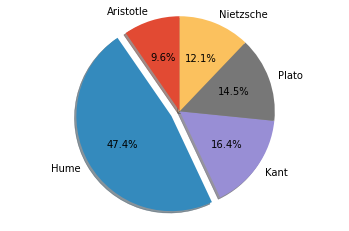

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Aristotle', 'Hume', 'Kant','Plato', 'Nietzsche'
sentences = [12034, 59353, 20551, 18130, 15183]
explode = (0, 0.1, 0, 0,0)  # only "explode" Hume as it contains the largest slice 

fig1, ax1 = plt.subplots()
ax1.pie(sentences, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie remains drawn as a circle.
plt.show()

[]

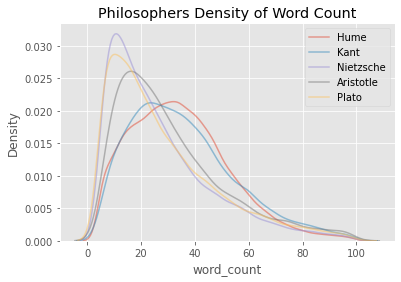

In [21]:

sns.kdeplot(df[df['author']=='Hume']['word_count'], alpha= 0.5,gridsize=200)
sns.kdeplot(df[df['author']=='Kant']['word_count'], alpha= 0.5)
sns.kdeplot(df[df['author']=='Nietzsche']['word_count'], alpha= 0.5)
sns.kdeplot(df[df['author']=='Aristotle']['word_count'], alpha= 0.5)
sns.kdeplot(df[df['author']=='Plato']['word_count'], alpha= 0.5)
plt.legend(('Hume','Kant','Nietzsche','Aristotle','Plato'))
plt.title('Philosophers Density of Word Count')
plt.plot()


### Philosopher Word Count Per Author

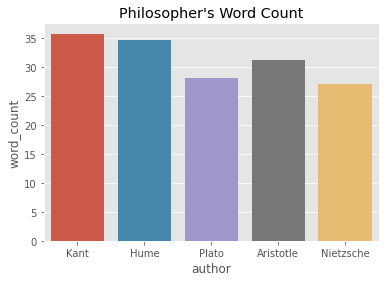

In [22]:

sns.barplot(data=df, x= df['author'],y=df['word_count'],ci=False)
plt.title("Philosopher's Word Count")
plt.savefig('word_count.png')



### Philosopher Characters per Sentence

[]

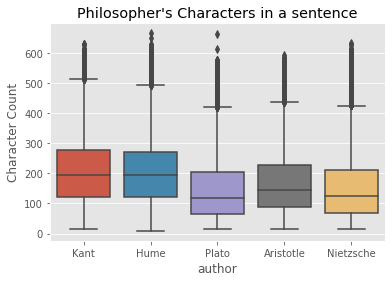

In [23]:

sns.boxplot(data= df, x='author',y='CHAR_count',)
plt.title("Philosopher's Characters in a sentence")
plt.ylabel("Character Count")
plt.plot()

###  Philosopher Stop Word Count Comparison

[]

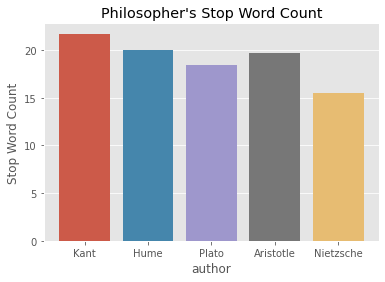

In [24]:

sns.barplot(data = df, x= df['author'],y= df['stop_words_count'],ci=False)
plt.title("Philosopher's Stop Word Count")
plt.ylabel("Stop Word Count")
plt.plot()


###  Philosopher Number Count Comparison

[]

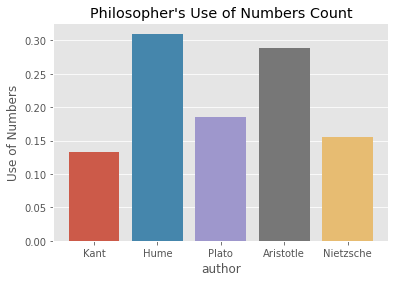

In [25]:

sns.barplot(data=df, x= df['author'],y=df['NUM_count'],ci=False)
plt.title("Philosopher's Use of Numbers Count")
plt.ylabel("Use of Numbers")
plt.plot()



###  Philosopher Proper Noun Count

[]

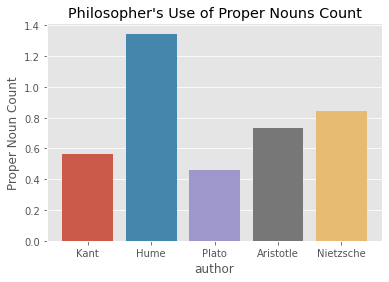

In [26]:

sns.barplot(data=df, x= df['author'],y=df['PROPN_count'],ci=False)
plt.title("Philosopher's Use of Proper Nouns Count")
plt.ylabel("Proper Noun Count")
plt.plot()


###  Philosopher Pronoun Count Comparison

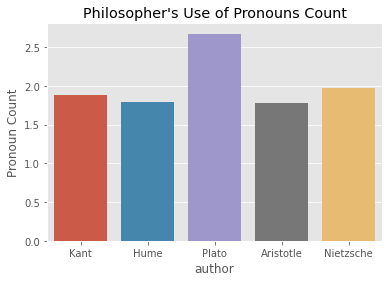

In [27]:

sns.barplot(data=df, x= df['author'],y=df['PRON_count'],ci=False)
plt.title("Philosopher's Use of Pronouns Count")
plt.ylabel("Pronoun Count")
plt.show()


###  Philosopher Interjection Count Comparison

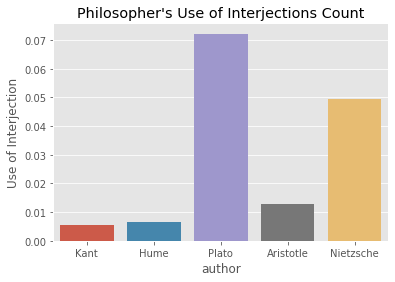

In [28]:

sns.barplot(data=df, x= df['author'],y=df['INTJ_count'],ci=False)
plt.title("Philosopher's Use of Interjections Count")
plt.ylabel("Use of Interjection")
plt.show()


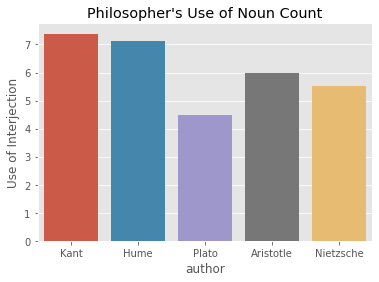

In [29]:

sns.barplot(data=df, x= df['author'],y=df['NOUN_count'],ci=False)
plt.title("Philosopher's Use of Noun Count")
plt.ylabel("Use of Interjection")
plt.show()


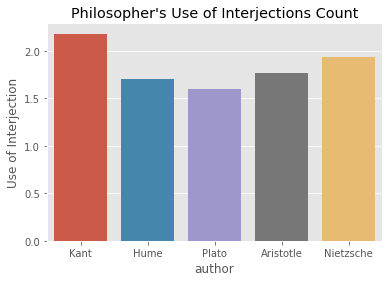

In [30]:

sns.barplot(data=df, x= df['author'],y=df['ADV_count'],ci=False)
plt.title("Philosopher's Use of Interjections Count")
plt.ylabel("Use of Interjection")
plt.show()


## uni-grams, bi-grams, tri-grams, 4-grams


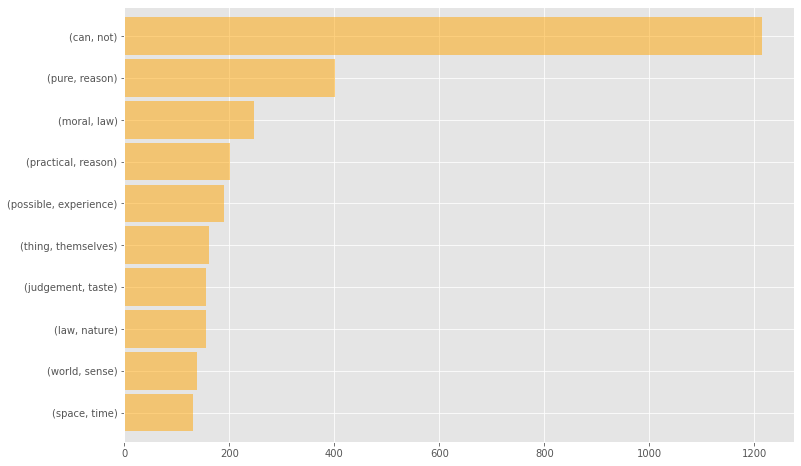

In [63]:
# Import nltk n-gram utilities
from nltk.util import ngrams

# Generate and plot n-grams
bigram_series =(pd.Series(nltk.ngrams(kant_tokens, 2)).value_counts())[:10]

bigram_series.sort_values().plot.barh(color='orange',alpha=0.5 ,width=.9, figsize=(12, 8))


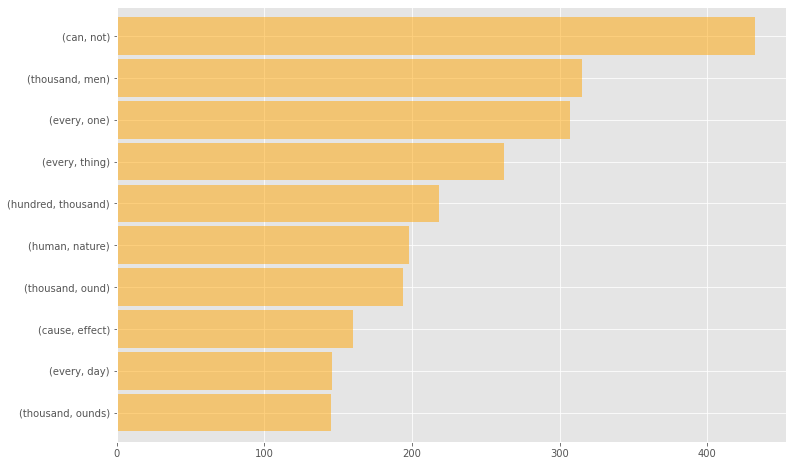

In [64]:

bigram_series = pd.Series(nltk.ngrams(hume_tokens, 2)).value_counts()[:10]

bigram_series.sort_values().plot.barh(color='orange',alpha=0.5 ,width=.9, figsize=(12, 8))




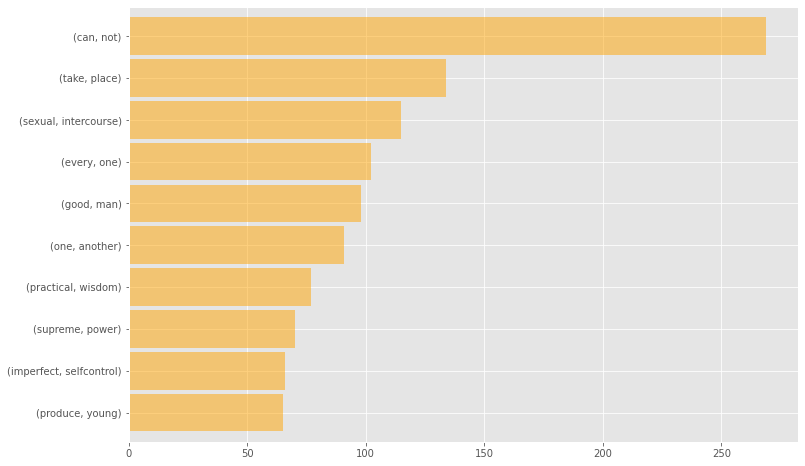

In [65]:

bigram_series = pd.Series(nltk.ngrams(aristotle_tokens, 2)).value_counts()[:10]

bigram_series.sort_values().plot.barh(color='orange',alpha = 0.5 ,width=.9, figsize=(12, 8))


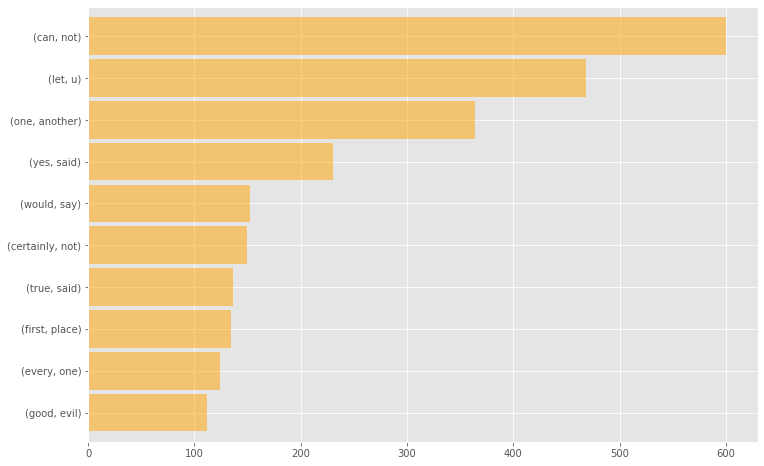

In [66]:

bigram_series = pd.Series(nltk.ngrams(plato_tokens, 2)).value_counts()[:10]

bigram_series.sort_values().plot.barh(color='orange',alpha = 0.5 ,width=.9, figsize=(12, 8))



## Word Clouds

### Word Cloud- Aristotle

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(aristotle_corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud- Kant


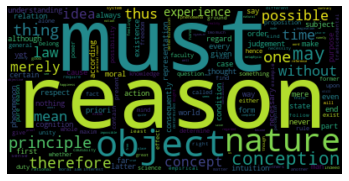

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(kant_corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud- Nietzsche


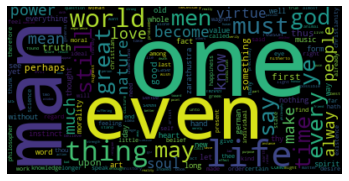

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(nietzsche_corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud- Hume

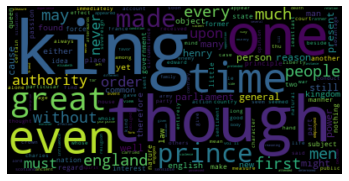

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(hume_corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud- Plato

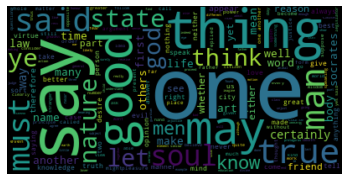

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(plato_corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency Distributions

### Plato Frequency Distribution

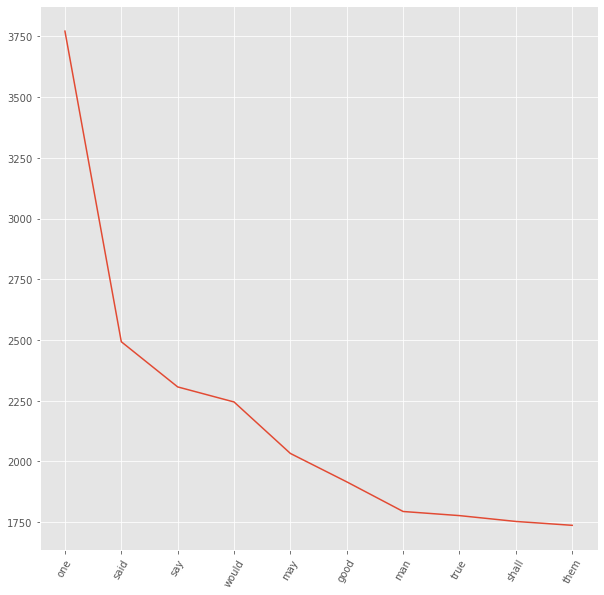

In [67]:
# freqdist

all_fdist = nltk.FreqDist(plato_tokens).most_common(10)

## Conversion to Pandas series for plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes and x-tick rotation
all_plot = sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);


### Hume Frequency Distribution

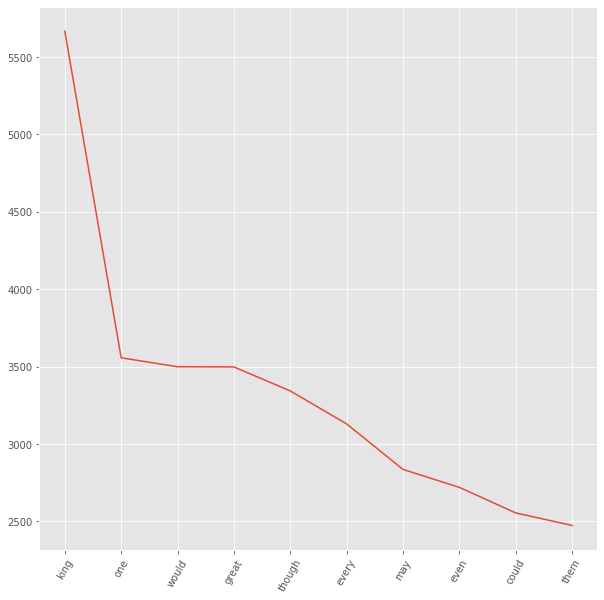

In [68]:
all_fdist = nltk.FreqDist(hume_tokens).most_common(10)

## Conversion to Pandas series for plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes and x-tick rotation
all_plot = sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

### Aristotle Frequency Distribution

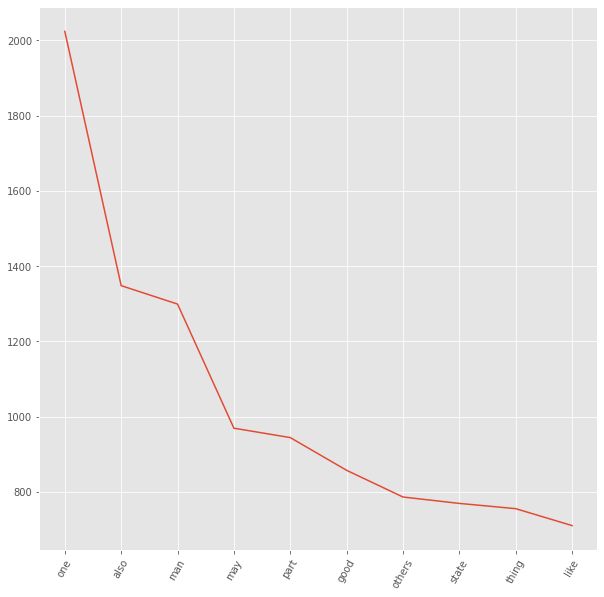

In [69]:
all_fdist = nltk.FreqDist(aristotle_tokens).most_common(10)

## Conversion to Pandas series for plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes and x-tick rotation
all_plot = sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

### Kant Frequency Distribution

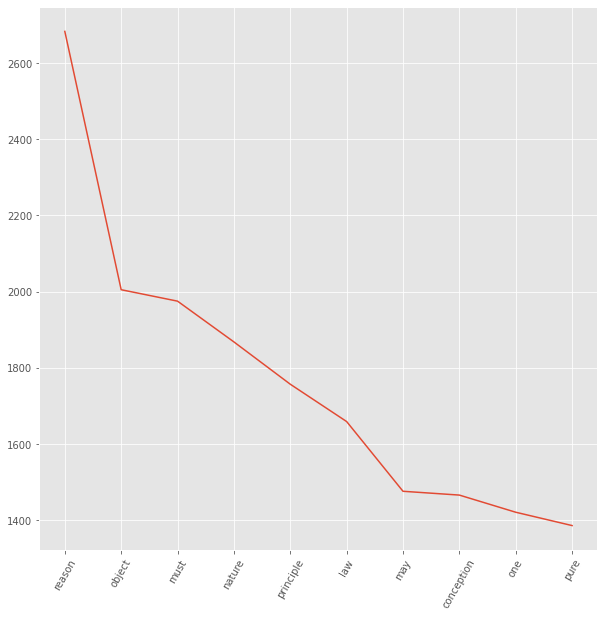

In [70]:
all_fdist = nltk.FreqDist(kant_tokens).most_common(10)

## Conversion to Pandas series for plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes and x-tick rotation
all_plot = sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

### Nietzsche Frequency Distribution

In [65]:


t = []
for i in nietzsche_tokens:
  w = remove_punct(i)
  w = re.sub(" ","",w)
  w = w.strip(" ")
  w = re.sub("one","",w)
  t.append(w)

  

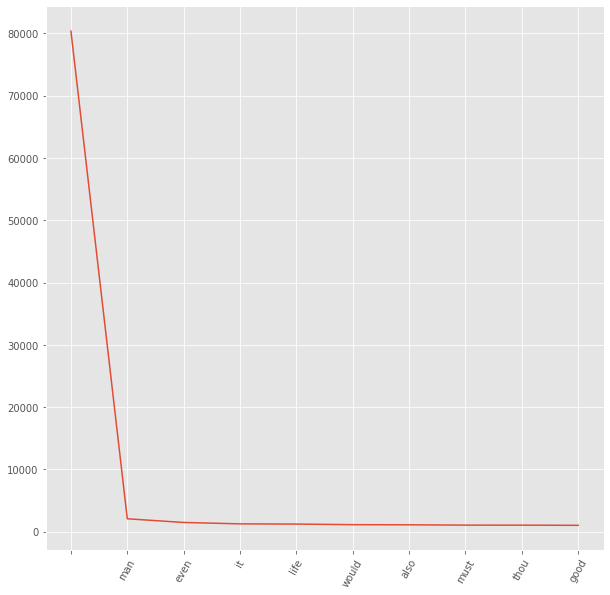

In [66]:
all_fdist = nltk.FreqDist(t).most_common(10)

## Conversion to Pandas series for plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes and x-tick rotation
all_plot = sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

In [ ]:
 ml = []

# Data Prep Before Modelling 

## Re-sampling

In [ ]:
# Checking for class imbalances before machine learning
df_n['author'].value_counts()

HUM    45328
PLT    19741
NZE    18589
KNT    13288
ALE    10188
Name: author, dtype: int64

In [ ]:
# Checking proportion of imbalance
(df_n['author'].value_counts() / len(df)).sort_values(ascending=False)

HUM    0.423096
PLT    0.184265
NZE    0.173512
KNT    0.124032
ALE    0.095096
Name: author, dtype: float64

In [ ]:
# Function: Sampling to manage class imbalance

def sample_data(df_data, stratify_col_name, stratify_val, stratify_prop, random_state=None):
    """
    Returns:
        DataFrame: a new dataframe based the representing equal  proportions of the data.
    """
    df_stratified = pd.DataFrame(columns = df_data.columns) # Create an empty data frame with column names matching the dataframe your using

    pos = -1
    for i in range(len(stratify_val)): # iterate over the stratify values (e.g. "classes" etc.)
        pos += 1
        if pos == len(stratify_val) - 1: 
            ratio_len = len(df_data) - len(df_stratified) # if this is the final iteration calculate the number of values in the last so the number of rows as the source data
        else:
            ratio_len = int(len(df_data) * stratify_prop[i]) # Calculate the number of rows to match the proportion 

        df_filtered = df_data[df_data[stratify_col_name] ==stratify_val[i]] # Filter the source data on the currently selected stratify values
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state) # Sample the filtered data using the calculated ratio
        
        df_stratified = pd.concat([df_stratified, df_temp]) # Add the stratified datasets together to produce the final result
        
    return df_stratified # Return the re-sampled data  
    
    

In [ ]:

# Applying Re-Sampling

stratify_values = ['KNT', 'HUM', 'PLT', 'ALE', 'NZE']
stratify_proportions = [0.20, 0.20, 0.20, 0.20,0.20]
df_stratified = sample_data(df_n, 'author', stratify_values, stratify_proportions, random_state=42)


In [ ]:

# Verfying sample's classes are proportionate

(df_stratified['author'].value_counts() / len(df)).sort_values(ascending=False)


NZE    0.200030
ALE    0.199993
PLT    0.199993
KNT    0.199993
HUM    0.199993
Name: author, dtype: float64

In [ ]:
df_stratified.head()

,label,author,sentence
7270,0,KNT,"now every change has a cause, which evidences ..."
860,0,KNT,the presupposition of the moral feeling in man.
5390,0,KNT,"for if, on the one hand, we place them in pure..."
5191,0,KNT,now it is clear from the analytic that the max...
11964,0,KNT,the federation of europe will follow the feder...


## MACHINE LEARNING MODELLING PHASE - PHILOSOPHERS TEXT 

## Sci-kit Learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_stratified = pd.read_csv("/content/drive/MyDrive/data/df_strat.csv")

df_stratified.head()

,author,sentence,label
0,KNT,"now every change has a cause, which evidences ...",0
1,KNT,the presupposition of the moral feeling in man.,0
2,KNT,"for if, on the one hand, we place them in pure...",0
3,KNT,now it is clear from the analytic that the max...,0
4,KNT,the federation of europe will follow the feder...,0


### Importing Packages

In [ ]:

# Importing Utilities for Machine Learning:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Import Metrics Packages
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score, roc_curve, roc_auc_score, f1_score, recall_score, precision_score 
from sklearn import metrics

from sklearn.metrics import cohen_kappa_score

# Importing Pipeline, Models and cross-validation tools:

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

# Importing Data Visualisation Libraries

import matplotlib.pyplot as plt 
import seaborn as sns


## Linear Support Vector Classifier

In [ ]:

# Input Variables
X = df_stratified.sentence

# Output Variables
y = df_stratified.author


In [ ]:

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

#1. Setting a pipeline for SF + TF-IDF + SVM

sf_tfidf_svc= Pipeline([('tfid',TfidfVectorizer(analyzer='word')),
                        ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])

#2. Setting a pipeline for: SF + BOW + SVM

sf_bow_svc = Pipeline([('countvect',CountVectorizer(analyzer='word')),
                       ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=500))])

#3. Setting a pipeline for: (BI-GRAM,TRI-GRAM)+ BOW + SVM

bt_bow_svc = Pipeline([('countvect',CountVectorizer(ngram_range=(2,3),analyzer='word')),
                       ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])

#4. Setting a pipeline for: (BI-GRAM,TRI-GRAM) + TFIDF + SVM

bt_tfidf_svc = Pipeline([('tfid',TfidfVectorizer(ngram_range=(2,3),analyzer='word')),
                         ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])

#5. Setting a pipeline for: (BI-GRAM,4-GRAM)+ BOW + SVM

b4_bow_svc = Pipeline([('countvect',CountVectorizer(ngram_range=(2,4),analyzer='word')),
                       ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])

#6. Setting a pipeline for: (BI-GRAM,4-GRAM) + TFIDF + SVM

b4_tfidf_svc = Pipeline([('tfid',TfidfVectorizer(ngram_range=(2,4),analyzer='word')),
                         ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])

#7. Setting a pipeline for: (TRI-GRAM,4-GRAM)+ BOW + SVM

t4_bow_svc = Pipeline([('countvect',CountVectorizer(ngram_range=(3,4),analyzer='word')),
                       ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])

#8. Setting a pipeline for: (TRI-GRAM,4-GRAM) + TFIDF + SVM

t4_tfidf_svc = Pipeline([('tfid',TfidfVectorizer(ngram_range=(3,4),analyzer='word')),
                         ('svc',LinearSVC(penalty='l2',C=0.5,max_iter=700))])


In [ ]:

%time

#1. Fitting model for: SF + TF-IDF + SVM

sf_tfidf_svc.fit(X_train,y_train)

#2. Fitting model for: SF + BOW + SVM

sf_bow_svc.fit(X_train,y_train)

#3. Fitting model for: (BI-GRAM,TRI-GRAM)+ BOW + SVM

bt_bow_svc.fit(X_train,y_train) 

#4. Fitting model for: (BI-GRAM,TRI-GRAM) + TFIDF + SVM

bt_tfidf_svc.fit(X_train,y_train) 

#5. Fitting model for: (BI-GRAM,4-GRAM)+ BOW + SVM

b4_bow_svc.fit(X_train,y_train) 

#6. Fitting model for: (BI-GRAM,4-GRAM) + TFIDF + SVM

b4_tfidf_svc.fit(X_train,y_train) 

#7. Fitting model for: (TRI-GRAM,4-GRAM)+ BOW + SVM

t4_bow_svc.fit(X_train,y_train) 

#8. Fitting model for: (TRI-GRAM,4-GRAM) + TFIDF + SVM

t4_tfidf_svc.fit(X_train,y_train) 


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(3, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=0.5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                

In [ ]:

#1. Prediction for model: SF + TF-IDF + SVM

sf_tfidf_pred = sf_tfidf_svc.predict(X_test)

#2. Prediction for model: SF + BOW + SVM

sf_bow_pred =sf_bow_svc.predict(X_test)

#3. Prediction for model: (BI-GRAM,TRI-GRAM)+ BOW + SVM

bt_bow_pred = bt_bow_svc.predict(X_test)

#4. Prediction for model: (BI-GRAM,TRI-GRAM) + TFIDF + SVM

bt_tfidf_pred= bt_tfidf_svc.predict(X_test)

#5. Prediction for model: (BI-GRAM,4-GRAM)+ BOW + SVM

b4_bow_pred = b4_bow_svc.predict(X_test)

#6. Prediction for model: (BI-GRAM,4-GRAM) + TFIDF + SVM

b4_tfidf_pred = b4_tfidf_svc.predict(X_test)

#7. Prediction for model: (TRI-GRAM,4-GRAM)+ BOW + SVM

t4_bow_pred = t4_bow_svc.predict(X_test)

#8. Prediction for model: (TRI-GRAM,4-GRAM) + TFIDF + SVM

t4_tfidf_pred = t4_tfidf_svc.predict(X_test)



### Linear Support Vector Classifier Model Performance

### SVC: CONFUSION MATRIX

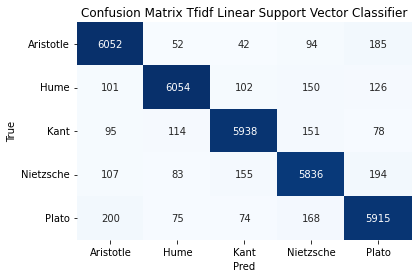

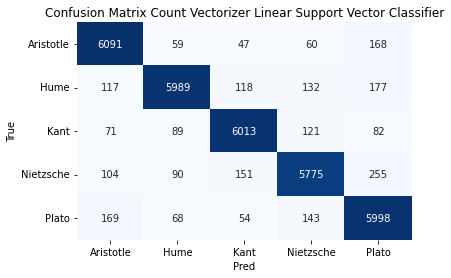

In [ ]:

# 1. Plot confusion matrix
philo_list = ['Kant', 'Hume', 'Plato', 'Aristotle','Nietzsche']
classes = np.unique(philo_list)
cm = metrics.confusion_matrix(y_test, sf_tfidf_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels=classes,yticklabels=classes
       ,title="Confusion Matrix Tfidf Linear Support Vector Classifier")
plt.yticks(rotation=0)
plt.show()

# 2. Plot confusion matrix
classes = np.unique(philo_list)
cm = metrics.confusion_matrix(y_test, sf_bow_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels=classes,yticklabels=classes
       ,title="Confusion Matrix Count Vectorizer Linear Support Vector Classifier")
plt.yticks(rotation=0)
plt.show()


### SVC: Classification Reports 

In [ ]:

#1. Evaluation for model: SF + TF-IDF + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(sf_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(sf_tfidf_pred,y_test)}")
print("\t")

#2. Evaluation for model: SF + BOW + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(sf_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(sf_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(sf_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(sf_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(sf_bow_pred,y_test)}")
print("\t")

#3. Evaluation for model: (BI-GRAM,TRI-GRAM)+ BOW + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(bt_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(bt_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(bt_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(bt_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(bt_bow_pred,y_test)}")
print("\t")

#4. Evaluation for model: (BI-GRAM,TRI-GRAM) + TFIDF + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(bt_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(bt_tfidf_pred,y_test)}")
print("\t")

#5. Evaluation for model: (BI-GRAM,4-GRAM)+ BOW + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(b4_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(b4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(b4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(b4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(b4_bow_pred,y_test)}")
print("\t")

#6. Evaluation for model: (BI-GRAM,4-GRAM) + TFIDF + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(b4_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(b4_tfidf_pred,y_test)}")
print("\t")

#7. Evaluation for model: (TRI-GRAM,4-GRAM)+ BOW + SVM
print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(t4_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(t4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(t4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(t4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(t4_bow_pred,y_test)}")
print("\t")


#8. Evaluation for model: (TRI-GRAM,4-GRAM) + TFIDF + SVM

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(t4_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(t4_tfidf_pred,y_test)}")
print("\t")

Tfidf Support Vector Classifier Accuracy: 0.9270091160822626
Tfidf Support Vector Classifier F1: 0.9270100741799631
Tfidf Support Vector Classifier Recall Score: 0.9271318990863792
Tfidf Support Vector Classifier Precision Score: 0.9270003956899686
Tfidf Vectorizer Support Vector Classifier Kappa Score: 0.9087611445157548
	
Tfidf Support Vector Classifier Accuracy: 0.9292492455119629
Tfidf Support Vector Classifier F1: 0.9292598815799071
Tfidf Support Vector Classifier Recall Score: 0.9295884459474644
Tfidf Support Vector Classifier Precision Score: 0.9292752929821797
Tfidf Vectorizer Support Vector Classifier Kappa Score: 0.9115616148047903
	
Tfidf Support Vector Classifier Accuracy: 0.9215954699604866
Tfidf Support Vector Classifier F1: 0.9217532348768265
Tfidf Support Vector Classifier Recall Score: 0.9223076568040728
Tfidf Support Vector Classifier Precision Score: 0.9216467139475586
Tfidf Vectorizer Support Vector Classifier Kappa Score: 0.9019954049959727
	
Tfidf Support Vector C

# SUPPORT VECTOR CLASSIFIER: MACHINE MODELLING EVALUATION PHASE - PHILOSOPHERS TEXT

### Linear SVM cross-validation

In [ ]:
# Cross Validation of Linear SVM Classifier 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_clf, X, y, cv=5,scoring='f1_macro',verbose=1)

print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.962 accuracy with a standard deviation of 0.002


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.0min finished


## Naive Bayes Multinomial Classifer NB

In [ ]:

# 9. Setting a pipeline for SF + TF-IDF + MNB

sf_tfidf_mnb= Pipeline([('tdif',TfidfVectorizer(analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 10. Setting a pipeline for: SF + BOW + MNB

sf_bow_mnb = Pipeline([('tdif',CountVectorizer(analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 11. Setting a pipeline for: (BI-GRAM,TRI-GRAM)+ BOW + MNB

bt_bow_mnb = Pipeline([('tdif',CountVectorizer(ngram_range=(2,3),analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 12. Setting a pipeline for: (BI-GRAM,TRI-GRAM) + TFIDF + MNB

bt_tfidf_mnb = Pipeline([('tdif',TfidfVectorizer(ngram_range=(2,3),analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 13. Setting a pipeline for: (BI-GRAM,4-GRAM)+ BOW + MNB

b4_bow_mnb = Pipeline([('tdif',CountVectorizer(ngram_range=(2,4),analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 14. Setting a pipeline for: (BI-GRAM,4-GRAM) + TFIDF + MNB

b4_tfidf_mnb = Pipeline([('tdif',TfidfVectorizer(ngram_range=(2,4),analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 15. Setting a pipeline for: (TRI-GRAM,4-GRAM)+ BOW + MNB

t4_bow_mnb = Pipeline([('tdif',CountVectorizer(ngram_range=(3,4),analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])

# 16. Setting a pipeline for: (TRI-GRAM,4-GRAM) + TFIDF + MNB

t4_tfidf_mnb = Pipeline([('tdif',TfidfVectorizer(ngram_range=(3,4),analyzer='word')),
                   ('naivebaiyes',MultinomialNB(alpha=0.1,
                    class_prior=None ,fit_prior=True))])


In [ ]:

%time

#9. Fitting model for: SF + TF-IDF + MNB

sf_tfidf_mnb.fit(X_train,y_train)

#10. Fitting model for: SF + BOW + MNB

sf_bow_mnb.fit(X_train,y_train)

#11. Fitting model for: (BI-GRAM,TRI-GRAM)+ BOW + MNB

bt_bow_mnb.fit(X_train,y_train) 

#12. Fitting model for: (BI-GRAM,TRI-GRAM) + TFIDF + MNB

bt_tfidf_mnb.fit(X_train,y_train) 

#13. Fitting model for: (BI-GRAM,4-GRAM)+ BOW + MNB

b4_bow_mnb.fit(X_train,y_train) 

#14. Fitting model for: (BI-GRAM,4-GRAM) + TFIDF + MNB

b4_tfidf_mnb.fit(X_train,y_train) 

#15. Fitting model for: (TRI-GRAM,4-GRAM)+ BOW + MNB

t4_bow_mnb.fit(X_train,y_train) 

#16. Fitting model for: (TRI-GRAM,4-GRAM) + TFIDF + MNB

t4_tfidf_mnb.fit(X_train,y_train) 


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


Pipeline(memory=None,
         steps=[('tdif',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(3, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('naivebaiyes',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:

#9. Prediction for model: SF + TF-IDF + MNB

sf_tfidf_pred = sf_tfidf_mnb.predict(X_test)

#10. Prediction for model: SF + BOW + MNB

sf_bow_pred =sf_bow_mnb.predict(X_test)

#11. Prediction for model: (BI-GRAM,TRI-GRAM)+ BOW + MNB

bt_bow_pred = bt_bow_mnb.predict(X_test)

#12. Prediction for model: (BI-GRAM,TRI-GRAM) + TFIDF + MNB

bt_tfidf_pred= bt_tfidf_mnb.predict(X_test)

#13. Prediction for model: (BI-GRAM,4-GRAM)+ BOW + MNB

b4_bow_pred= b4_bow_mnb.predict(X_test)

#14. Prediction for model: (BI-GRAM,4-GRAM) + TFIDF + MNB

b4_tfidf_pred = b4_tfidf_mnb.predict(X_test)

#15. Prediction for model: (TRI-GRAM,4-GRAM)+ BOW + MNB

t4_bow_pred = t4_bow_mnb.predict(X_test)

#16. Prediction for model: (TRI-GRAM,4-GRAM) + TFIDF + MNB

t4_tfidf_pred = t4_tfidf_mnb.predict(X_test)


### Multinomial NB Model Performance

In [ ]:

#9. Evaluation for model: SF + TF-IDF + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(sf_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(sf_tfidf_pred,y_test)}")
print("\t")

#10. Evaluation for model: SF + BOW + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(sf_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(sf_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(sf_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(sf_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(sf_bow_pred,y_test)}")
print("\t")

#11. Evaluation for model: (BI-GRAM,TRI-GRAM)+ BOW + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(bt_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(bt_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(bt_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(bt_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(bt_bow_pred,y_test)}")
print("\t")

#12. Evaluation for model: (BI-GRAM,TRI-GRAM) + TFIDF + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(bt_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(bt_tfidf_pred,y_test)}")
print("\t")

#13. Evaluation for model: (BI-GRAM,4-GRAM)+ BOW + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(b4_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(b4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(b4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(b4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(b4_bow_pred,y_test)}")
print("\t")

#14. Evaluation for model: (BI-GRAM,4-GRAM) + TFIDF + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(b4_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(b4_tfidf_pred,y_test)}")
print("\t")

#15. Evaluation for model: (TRI-GRAM,4-GRAM)+ BOW + MNB
print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(t4_bow_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(t4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(t4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(t4_bow_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(t4_bow_pred,y_test)}")
print("\t")


#16. Evaluation for model: (TRI-GRAM,4-GRAM) + TFIDF + MNB

print(f"Tfidf Support Vector Classifier Accuracy: {accuracy_score(t4_tfidf_pred,y_test)}")
print(f"Tfidf Support Vector Classifier F1: {f1_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Recall Score: {recall_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Support Vector Classifier Precision Score: {precision_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"Tfidf Vectorizer Support Vector Classifier Kappa Score: {cohen_kappa_score(t4_tfidf_pred,y_test)}")
print("\t")

Tfidf Support Vector Classifier Accuracy: 0.8900158675834604
Tfidf Support Vector Classifier F1: 0.8902150554880132
Tfidf Support Vector Classifier Recall Score: 0.8919053212962134
Tfidf Support Vector Classifier Precision Score: 0.8900828068013263
Tfidf Vectorizer Support Vector Classifier Kappa Score: 0.8625252283050975
	
Tfidf Support Vector Classifier Accuracy: 0.8827976727544258
Tfidf Support Vector Classifier F1: 0.8829535490821059
Tfidf Support Vector Classifier Recall Score: 0.884375686947964
Tfidf Support Vector Classifier Precision Score: 0.882928533914168
Tfidf Vectorizer Support Vector Classifier Kappa Score: 0.8535072968177924
	
Tfidf Support Vector Classifier Accuracy: 0.9343517625462805
Tfidf Support Vector Classifier F1: 0.9341936601757258
Tfidf Support Vector Classifier Recall Score: 0.9354959929624014
Tfidf Support Vector Classifier Precision Score: 0.9343852638888865
Tfidf Vectorizer Support Vector Classifier Kappa Score: 0.917940485932225
	
Tfidf Support Vector Clas

### MultinomialNB: Confusion Matrix

In [ ]:

# MultinomialNB Confusion Matrix
classes = np.unique(philo_list)
cm = metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels=classes,yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)
plt.show()


### MultinomialNB: Classification Report 

In [ ]:
# Classification Reports 
print("Tfidf Multinomial NB Classification Report")
print("\t")
print(classification_report(pred,y_test))
print("\t")
print("\t")
print("Count Vectorizer Multinomial NB Classification Report")
print("\t")
print(classification_report(pred_2,y_test))


Tfidf Multinomial NB Classification Report
	
              precision    recall  f1-score   support

         ALE       0.97      0.96      0.96      5425
         HUM       0.92      0.97      0.94      5150
         KNT       0.97      0.92      0.94      5733
         NZE       0.91      0.98      0.95      4942
         PLT       0.96      0.93      0.95      5534

    accuracy                           0.95     26784
   macro avg       0.95      0.95      0.95     26784
weighted avg       0.95      0.95      0.95     26784

	
	
Count Vectorizer Multinomial NB Classification Report
	
              precision    recall  f1-score   support

         ALE       0.96      0.94      0.95      5416
         HUM       0.92      0.95      0.94      5243
         KNT       0.96      0.92      0.94      5624
         NZE       0.92      0.94      0.93      5182
         PLT       0.91      0.92      0.92      5319

    accuracy                           0.93     26784
   macro avg       0.93   

# NAIVE BAYES: MACHINE MODELLING EVALUATION PHASE - PHILOSOPHERS TEXT

### Naive Bayes Cross-validation

In [ ]:
# Cross validation for thte model

scores = cross_val_score(nb_clf, X, y, cv=5)

print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))


0.951 accuracy with a standard deviation of 0.002


## RandomForest Model

In [ ]:

# 17. Setting a pipeline for SF + TF-IDF + RF

sf_tfidf_rf= Pipeline([('cv',TfidfVectorizer(analyzer='word')),
                       ('rf',RandomForestClassifier())])

# 18. Setting a pipeline for: SF + BOW + RF

sf_bow_rf = Pipeline([('cv',CountVectorizer(analyzer='word')),
                       ('rf',RandomForestClassifier())])

# 19. Setting a pipeline for: (BI-GRAM,TRI-GRAM)+ BOW + RF

bt_bow_rf = Pipeline([('cv',CountVectorizer(ngram_range=(2,3),analyzer='word')),
                       ('rf',RandomForestClassifier())])

# 20. Setting a pipeline for: (BI-GRAM,TRI-GRAM) + TFIDF + RF

bt_tfidf_rf = Pipeline([('cv',TfidfVectorizer(ngram_range=(2,3),analyzer='word')),
                       ('rf',RandomForestClassifier())])

# 21. Setting a pipeline for: (BI-GRAM,4-GRAM)+ BOW + RF

b4_bow_rf = Pipeline([('cv',CountVectorizer(ngram_range=(2,4),analyzer='word')),
                       ('rf',RandomForestClassifier())])


# 22. Setting a pipeline for: (BI-GRAM,4-GRAM) + TFIDF + RF

b4_tfidf_rf = Pipeline([('cv',TfidfVectorizer(ngram_range=(2,4),analyzer='word')),
                       ('rf',RandomForestClassifier())])


# 23. Setting a pipeline for: (TRI-GRAM,4-GRAM)+ BOW + RF

t4_bow_rf = Pipeline([('cv',CountVectorizer(ngram_range=(3,4),analyzer='word')),
                       ('rf',RandomForestClassifier())])

# 24. Setting a pipeline for: (TRI-GRAM,4-GRAM) + TFIDF + RF

t4_tfidf_rf = Pipeline([('cv',TfidfVectorizer(ngram_range=(3,4),analyzer='word')),
                       ('rf',RandomForestClassifier())])


'Other bagging and boosting models that are currently under trial'

In [ ]:

%time

#17. Fitting model for: SF + TF-IDF + RF

sf_tfidf_rf.fit(X_train,y_train)

#18. Fitting model for: SF + BOW + RF

sf_bow_rf.fit(X_train,y_train)

#19. Fitting model for: (BI-GRAM,TRI-GRAM)+ BOW + RF

bt_bow_rf.fit(X_train,y_train) 

#20. Fitting model for: (BI-GRAM,TRI-GRAM) + TFIDF + RF

bt_tfidf_rf.fit(X_train,y_train) 

#21. Fitting model for: (BI-GRAM,4-GRAM)+ BOW + RF

b4_bow_rf.fit(X_train,y_train) 

#22. Fitting model for: (BI-GRAM,4-GRAM) + TFIDF + RF

b4_tfidf_rf.fit(X_train,y_train) 

#23. Fitting model for: (TRI-GRAM,4-GRAM)+ BOW + RF

t4_bow_rf.fit(X_train,y_train) 

#24. Fitting model for: (TRI-GRAM,4-GRAM) + TFIDF + RF

t4_tfidf_rf.fit(X_train,y_train) 


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [ ]:

#17. Prediction for model: SF + TF-IDF + RF

sf_tfidf_pred = sf_tfidf_rf.predict(X_test)

#18. Prediction for model: SF + BOW + RF

sf_bow_pred =sf_bow_rf.predict(X_test)

#19. Prediction for model: (BI-GRAM,TRI-GRAM)+ BOW + RF

bt_bow_pred = bt_bow_rf.predict(X_test)

#20. Prediction for model: (BI-GRAM,TRI-GRAM) + TFIDF + RF

bt_tfidf_pred= bt_tfidf_rf.predict(X_test)

#21. Prediction for model: (BI-GRAM,4-GRAM)+ BOW + RF

b4_bow_pred= b4_bow_rf.predict(X_test)

#22. Prediction for model: (BI-GRAM,4-GRAM) + TFIDF + RF

b4_tfidf_pred = b4_tfidf_rf.predict(X_test)

#23. Prediction for model: (TRI-GRAM,4-GRAM)+ BOW + RF

t4_bow_pred = t4_bow_rf.predict(X_test)

#24. Prediction for model: (TRI-GRAM,4-GRAM) + TFIDF + RF

t4_tfidf_pred = t4_tfidf_rf.predict(X_test)


# RANDOMFOREST CLASSIFIER: MACHINE MODELLING EVALUATION PHASE - PHILOSOPHERS TEXT

### Random Forest Classifier Model Performance

In [ ]:

#17. Evaluation for model: SF + TF-IDF + RF

print(f"SF + TF-IDF + RF Accuracy: {accuracy_score(sf_tfidf_pred,y_test)}")
print(f"SF + TF-IDF + RF F1: {f1_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"SF + TF-IDF + RF Recall Score: {recall_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"SF + TF-IDF + RF Precision Score: {precision_score(sf_tfidf_pred,y_test,average='macro')}")
print(f"SF + TF-IDF + RF Kappa Score: {cohen_kappa_score(sf_tfidf_pred,y_test)}")
print("\t")

#18. Evaluation for model: SF + BOW + RF

print(f"SF + BOW + RF Accuracy: {accuracy_score(sf_bow_pred,y_test)}")
print(f"SF + BOW + RF F1: {f1_score(sf_bow_pred,y_test,average='macro')}")
print(f"SF + BOW + RF Recall Score: {recall_score(sf_bow_pred,y_test,average='macro')}")
print(f"SF + BOW + RF Precision Score: {precision_score(sf_bow_pred,y_test,average='macro')}")
print(f"SF + BOW + RF Kappa Score: {cohen_kappa_score(sf_bow_pred,y_test)}")
print("\t")

#19. Evaluation for model: (BI-GRAM,TRI-GRAM)+ BOW + RF

print(f"(BI-GRAM,TRI-GRAM)+ BOW + RF Accuracy: {accuracy_score(bt_bow_pred,y_test)}")
print(f"(BI-GRAM,TRI-GRAM)+ BOW + RF F1: {f1_score(bt_bow_pred,y_test,average='macro')}")
print(f"(BI-GRAM,TRI-GRAM)+ BOW + RF Recall Score: {recall_score(bt_bow_pred,y_test,average='macro')}")
print(f"(BI-GRAM,TRI-GRAM)+ BOW + RF Precision Score: {precision_score(bt_bow_pred,y_test,average='macro')}")
print(f"(BI-GRAM,TRI-GRAM)+ BOW + RF Kappa Score: {cohen_kappa_score(bt_bow_pred,y_test)}")
print("\t")

#20. Evaluation for model: (BI-GRAM,TRI-GRAM) + TFIDF + RF

print(f"(BI-GRAM,TRI-GRAM) + TFIDF + RF Accuracy: {accuracy_score(bt_tfidf_pred,y_test)}")
print(f"(BI-GRAM,TRI-GRAM) + TFIDF + RF F1: {f1_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"(BI-GRAM,TRI-GRAM) + TFIDF + RF Recall Score: {recall_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"(BI-GRAM,TRI-GRAM) + TFIDF + RF Score: {precision_score(bt_tfidf_pred,y_test,average='macro')}")
print(f"(BI-GRAM,TRI-GRAM) + TFIDF + RF Kappa Score: {cohen_kappa_score(bt_tfidf_pred,y_test)}")
print("\t")

#21. Evaluation for model: (BI-GRAM,4-GRAM)+ BOW + RF

print(f"(BI-GRAM,4-GRAM)+ BOW + RF Accuracy: {accuracy_score(b4_bow_pred,y_test)}")
print(f"(BI-GRAM,4-GRAM)+ BOW + RF F1: {f1_score(b4_bow_pred,y_test,average='macro')}")
print(f"(BI-GRAM,4-GRAM)+ BOW + RF Recall Score: {recall_score(b4_bow_pred,y_test,average='macro')}")
print(f"(BI-GRAM,4-GRAM)+ BOW + RF Precision Score: {precision_score(b4_bow_pred,y_test,average='macro')}")
print(f"(BI-GRAM,4-GRAM)+ BOW + RF Classifier Kappa Score: {cohen_kappa_score(b4_bow_pred,y_test)}")
print("\t")

#22. Evaluation for model: (BI-GRAM,4-GRAM) + TFIDF + RF

print(f"(BI-GRAM,4-GRAM) + TFIDF + RF Accuracy: {accuracy_score(b4_tfidf_pred,y_test)}")
print(f"(BI-GRAM,4-GRAM) + TFIDF + RF F1: {f1_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"(BI-GRAM,4-GRAM) + TFIDF + RF Recall Score: {recall_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"(BI-GRAM,4-GRAM) + TFIDF + RF Precision Score: {precision_score(b4_tfidf_pred,y_test,average='macro')}")
print(f"(BI-GRAM,4-GRAM) + TFIDF + RF Kappa Score: {cohen_kappa_score(b4_tfidf_pred,y_test)}")
print("\t")

#23. Evaluation for model: (TRI-GRAM,4-GRAM)+ BOW + RF
print(f"(TRI-GRAM,4-GRAM)+ BOW + RF Accuracy: {accuracy_score(t4_bow_pred,y_test)}")
print(f"(TRI-GRAM,4-GRAM)+ BOW + RF F1: {f1_score(t4_bow_pred,y_test,average='macro')}")
print(f"(TRI-GRAM,4-GRAM)+ BOW + RF Recall Score: {recall_score(t4_bow_pred,y_test,average='macro')}")
print(f"(TRI-GRAM,4-GRAM)+ BOW + RF Precision Score: {precision_score(t4_bow_pred,y_test,average='macro')}")
print(f"(TRI-GRAM,4-GRAM)+ BOW + RF Kappa Score: {cohen_kappa_score(t4_bow_pred,y_test)}")
print("\t")


#24. Evaluation for model: (TRI-GRAM,4-GRAM) + TFIDF + RF

print(f"(TRI-GRAM,4-GRAM) + TFIDF + RF Accuracy: {accuracy_score(t4_tfidf_pred,y_test)}")
print(f"(TRI-GRAM,4-GRAM) + TFIDF + RF F1: {f1_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"(TRI-GRAM,4-GRAM) + TFIDF + RF Recall Score: {recall_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"(TRI-GRAM,4-GRAM) + TFIDF + RF Precision Score: {precision_score(t4_tfidf_pred,y_test,average='macro')}")
print(f"(TRI-GRAM,4-GRAM) + TFIDF + RF Kappa Score: {cohen_kappa_score(t4_tfidf_pred,y_test)}")
print("\t")

### RandomForest: Confusion Matrix

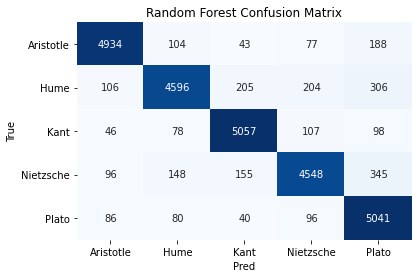

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
philo_list = ['Kant', 'Hume', 'Plato', 'Aristotle','Nietzsche']

# confusion_matrix(predictions_rf,y_test)

# Random Forest Classifier Confusion Matrix
classes = np.unique(philo_list)
cm = metrics.confusion_matrix(y_test, predictions_cv_rf)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels=classes,yticklabels=classes
       ,title="Random Forest Confusion Matrix")
plt.yticks(rotation=0)
plt.show()


### RandomForest: Classificaion Report

In [ ]:
# Classification Report for the Models 
print("Tfidf Random Forest Classifier Classification Report")
print(classification_report(predictions_cv_rf,y_test))


Tfidf Random Forest Classifier Classification Report
              precision    recall  f1-score   support

         ALE       0.92      0.94      0.93      5268
         HUM       0.85      0.92      0.88      5006
         KNT       0.94      0.92      0.93      5500
         NZE       0.86      0.90      0.88      5032
         PLT       0.94      0.84      0.89      5978

    accuracy                           0.90     26784
   macro avg       0.90      0.90      0.90     26784
weighted avg       0.90      0.90      0.90     26784



### Random Forest Cross-validation

In [ ]:
# Cross-validation for Model
scores = cross_val_score(rf_clf, X, y, cv=5,verbose=2)

print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))


# DEPLOYMENT PHASE - PHILOSOPHERS TEXT
## Saving models

In [ ]:

from sklearn.externals import joblib
sv = 'svc_clf.sav' 
mb = 'multinb_clf.sav'
xgb = 'xbg_clf.csv'
rf = 'rf_clf.csv'

joblib.dump('svc_clf',sv)
joblib.dump('multinb_clf',mb)
joblib.dump('xgb_clf',xgb)
joblib.dump('rf_clf',rf)

['rf_clf.csv']

# DEEP LEARNING MODELLING PHASE - PHILOSOPHERS TEXT 

## Deep Learning with **Keras**



In [ ]:

# Importing Layers, Sequential Model, Feature Extraction, Text Pre-processing, Tokenizer
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers

# Preprocessing Text with Keras
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Getting Train Test Split
from sklearn.model_selection import train_test_split
# Importing metric libraries 
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score, accuracy_score

# One-hot encoding, utilities, visualisation
from keras.utils.np_utils import to_categorical
from keras import utils 
from keras.utils.vis_utils import plot_model

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# LSTM Layers, Sequential Layers, Embedding, Dense Layers, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, MaxPooling1D,GRU,Bidirectional,Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df_stratified = pd.read_csv("/content/drive/MyDrive/data/df_strat.csv")

df_stratified.head()

,author,sentence,label
0,KNT,"now every change has a cause, which evidences ...",0
1,KNT,the presupposition of the moral feeling in man.,0
2,KNT,"for if, on the one hand, we place them in pure...",0
3,KNT,now it is clear from the analytic that the max...,0
4,KNT,the federation of europe will follow the feder...,0


## DEEP LEARNINIG MODEL DATA PRE-PROCESSING

In [ ]:
 from tensorflow import keras
# Split Between Variables into Input & Target Variable
X = df_stratified.sentence

y = df_stratified.label

# Converting One-hot Encoding Categorical Data
labels = keras.utils.to_categorical(y,num_classes=5)

# Creating Name of Philosophers List
philo_list = ['Kant', 'Hume', 'Plato', 'Aristotle','Nietzsche']

In [ ]:
max_vocab = 47000
max_len = 256

# Initialising Tokenizer
tokenizer = Tokenizer(num_words=max_vocab, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# Fit Tokenizer on Sentences
tokenizer.fit_on_texts(X.values) 
# Convert Text to Sequences of Texts
sequences = tokenizer.texts_to_sequences(X.values)
# Get word Index from Tokenizer
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Pad Sequences so They are of a Fixed Length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

Found 40780 unique tokens.


In [ ]:
# The sentence
print("The sentence before they are trasnformed into sequences: " + df_stratified.sentence[1])

print("\t")
# The Sequence
print("The sentences transformed into sequences: "+ str(sequences[1]))

print("\t")
# The Padded Sequence
print("The sentences padded to be of the same length: " + str(padded_sequences[1]))


The sentence before they are trasnformed into sequences: the presupposition of the moral feeling in man.
	
The sentences transformed into sequences: [1, 4181, 2, 1, 185, 343, 5, 59]
	
The sentences padded to be of the same length: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

## LSTM ARCHITECTURE & TRAINING

In [ ]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences , labels, test_size=0.30, random_state=42)


In [ ]:
epochs = 15
emb_dim = 300
batch_size = 256
vocab = len(word_index) + 1
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list =[early_stopping]
# [EarlyStopping(monitor='val_loss',patience=4, min_delta=0.0001)]


In [ ]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((74993, 256), (74993, 5), (32141, 256), (32141, 5))


In [ ]:


# Model layers
lstm_model = Sequential()
lstm_model.add(Embedding(vocab, emb_dim, input_length=padded_sequences.shape[1]))
lstm_model.add(SpatialDropout1D(0.5)) 
lstm_model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.7))
lstm_model.add(Dense(5, activation='softmax'))

# Model Compiler
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Model Summary
print(lstm_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 300)          12234300  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 256, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 12,328,065
Trainable params: 12,328,065
Non-trainable params: 0
_________________________________________________________________
None


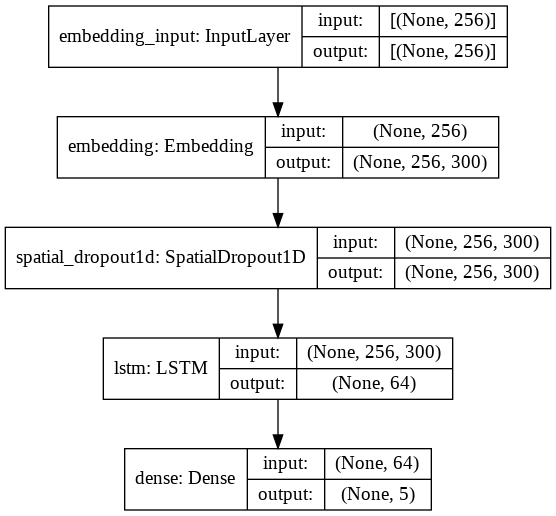

In [ ]:
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

%%time 
history = lstm_model.fit(X_train, y_train, epochs=15, batch_size=128,validation_split=0.2
                    ,callbacks=callbacks_list,shuffle=True) 


Epoch 1/15
469/469 [==============================] - 556s 1s/step - loss: 0.7929 - acc: 0.6979 - val_loss: 0.3943 - val_acc: 0.8653
Epoch 2/15
469/469 [==============================] - 548s 1s/step - loss: 0.3371 - acc: 0.8871 - val_loss: 0.3072 - val_acc: 0.8989
Epoch 3/15
469/469 [==============================] - 548s 1s/step - loss: 0.2320 - acc: 0.9233 - val_loss: 0.2816 - val_acc: 0.9111
Epoch 4/15
469/469 [==============================] - 550s 1s/step - loss: 0.1802 - acc: 0.9400 - val_loss: 0.2711 - val_acc: 0.9181
Epoch 5/15
469/469 [==============================] - 550s 1s/step - loss: 0.1452 - acc: 0.9520 - val_loss: 0.2861 - val_acc: 0.9167
Epoch 6/15
469/469 [==============================] - 549s 1s/step - loss: 0.1252 - acc: 0.9586 - val_loss: 0.2886 - val_acc: 0.9220
Epoch 7/15
469/469 [==============================] - 548s 1s/step - loss: 0.1049 - acc: 0.9653 - val_loss: 0.2925 - val_acc: 0.9235
Epoch 8/15
469/469 [==============================] - 546s 1s/step - 

# LSTM: EVALUATION PHASE - PHILOSOPHERS TEXT

## LSTM Model Evaluation





### LSTM model accuracy

In [ ]:

# Determining Accuracy of the LSTM model
accr = lstm_model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.4f}\n  Accuracy: {:0.4f}'.format(accr[0],accr[1]))


1005/1005 [==============================] - 78s 78ms/step - loss: 0.3034 - acc: 0.9238
Test set
  Loss: 0.3034
  Accuracy: 0.9238


### LSTM: Predictions and Model Metrics

In [ ]:
# Using LSTM to generate predictions on the test set
predictions = lstm_model.predict(x= X_test, batch_size = 10, verbose = 1) 


3215/3215 [==============================] - 249s 78ms/step


In [ ]:

# Rounding the predictions to generate the labels 
rounded_predictions = np.argmax(predictions,axis=-1)

# Making sure predictions are transformed into labels
rounded_predictions 

# Rounding the labels used generate the labels 
rounded_labels = np.argmax(y_test,axis=-1)

# Making sure labels are transformed into labels
rounded_labels 

array([2, 1, 4, ..., 2, 1, 3])

### LSTM: Classification Report 

In [ ]:
#1. Evaluation for model: SF+ DSWE + LSTM

print(f"SF + DSWE + LSTM Accuracy: {accuracy_score(rounded_predictions,rounded_labels)}")
print(f"SF + DSWE + LSTM F1: {f1_score(rounded_predictions,rounded_labels,average='macro')}")
print(f"SF + DSWE + LSTM Recall Score: {recall_score(rounded_predictions,rounded_labels,average='macro')}")
print(f"SF + DSWE + LSTM Precision Score: {precision_score(rounded_predictions,rounded_labels,average='macro')}")
print(f"SF + DSWE + LSTM Kappa Score: {cohen_kappa_score(rounded_predictions,rounded_labels)}")


SF + DSWE + LSTM Accuracy: 0.9237733735726953
SF + DSWE + LSTM F1: 0.9237860055344944
SF + DSWE + LSTM Recall Score: 0.924594514064865
SF + DSWE + LSTM Precision Score: 0.9236991711378642
SF + DSWE + LSTM Kappa Score: 0.9047129746185336


In [ ]:

# Turning the rounded predictions into a dataframe 
labels_pred = pd.DataFrame(rounded_predictions)
labels_pred.shape
y_test_sorted = np.argmax(y_test,axis=-1)

# Generate Confusion Matrix 
cm = confusion_matrix(y_true=rounded_labels,y_pred=rounded_predictions)

# Generate and Print Classification Report 
classifcation_rep = (classification_report(y_test_sorted,rounded_predictions))
print("LSTM Classification Report")
print(classifcation_rep)


LSTM Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6376
           1       0.94      0.93      0.93      6533
           2       0.88      0.94      0.91      6432
           3       0.94      0.93      0.93      6425
           4       0.93      0.89      0.91      6375

    accuracy                           0.92     32141
   macro avg       0.92      0.92      0.92     32141
weighted avg       0.92      0.92      0.92     32141



### LSTM Confusion Matrix

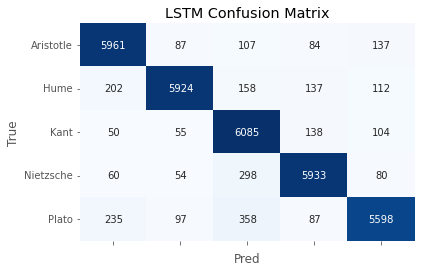

In [ ]:

# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(y_test_sorted, rounded_predictions)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="LSTM Confusion Matrix")
plt.yticks(rotation=0)
plt.show()


### LSTM: Plotting Result to Compare training vs. Validation 

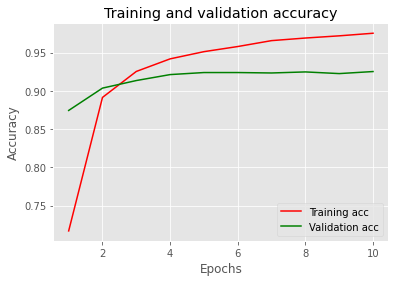

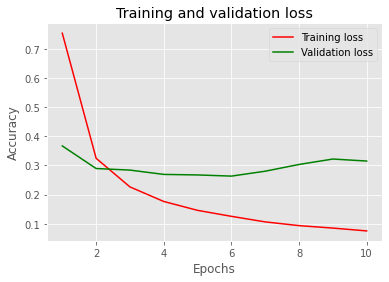

In [ ]:

# Comparing training and validation accuracy 

%matplotlib inline


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',  color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b',color='green', label='Validation acc')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss, 'b',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='green' ,label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# DEPLOYMENT PHASE - PHILOSOPHERS TEXT
## Saving LSTM model

In [ ]:
# lstm_model.save("lstm_model.h5")
# load.model('/content/lstm_model.h5')

## **BI-LSTM MODEL**


## BI-LSTM DATA PRE-PROCESSING

In [ ]:

# Creating input and output variables
sentences = df_stratified.sentence
labels = df_stratified.label


In [ ]:

# Importing and fitting tokenizer
from keras.preprocessing.text import Tokenizer
max_words = 47000 
max_len = 256 
tokenize = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenize.fit_on_texts(sentences.values)
# Converting texts to sequences then into a word index
sequences = tokenize.texts_to_sequences(sentences.values)
word_index = tokenize.word_index
print(len(word_index))
# Pading texts to limit the word count
X = pad_sequences(sequences,maxlen=max_len)
y = keras.utils.to_categorical(labels.values,num_classes=5)



40779


In [ ]:

# splitting training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)


In [ ]:

# Defining the number of epochs, embedding dimensions, batch size and vocab length required in the model
epochs = 15
emb_dim = 300
batch_size = 256
vocab = len(word_index) + 1


In [ ]:

# Checking that training and test set are the same input dims
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))


((80350, 256), (80350, 5), (26784, 256), (26784, 5))


### BI-LSTM MODEL ARCHITECTURE 


In [ ]:

# Model Architecture 2

model_bi_lstm = Sequential()
#
model_bi_lstm.add(Embedding(vocab,emb_dim))
model_bi_lstm.add(SpatialDropout1D(0.3))
model_bi_lstm.add(Bidirectional(LSTM(emb_dim, dropout=0.3, recurrent_dropout=0.3)))
model_bi_lstm.add(Dense(emb_dim, activation='relu'))
model_bi_lstm.add(Dropout(0.8))
model_bi_lstm.add(Dense(emb_dim, activation='relu')) 
model_bi_lstm.add(Dropout(0.8))
model_bi_lstm.add(Dense(5,activation='softmax'))

#
model_bi_lstm.summary()
model_bi_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         12234000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 300)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               1442400   
_________________________________________________________________
dense_3 (Dense)              (None, 300)               180300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)              

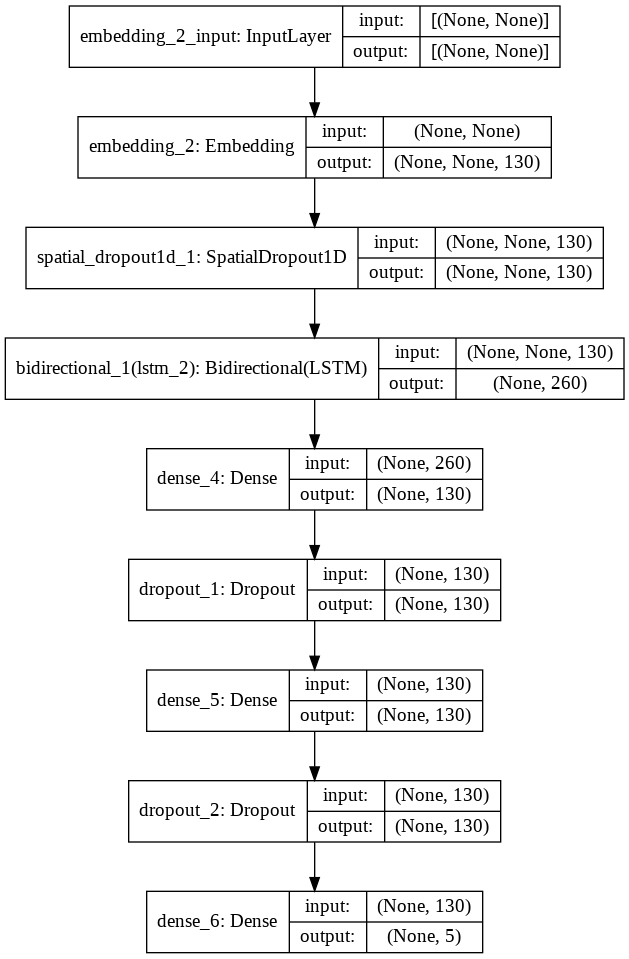

In [ ]:
plot_model(model_bi_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
%%time

history = model_bi_lstm.fit(X_train, y_train, epochs=epoch, batch_size=128,validation_split=0.2
                    ,callbacks=callbacks_list)


Epoch 1/15
 97/469 [=====>........................] - ETA: 15:54 - loss: 1.5853 - accuracy: 0.2414

# BI-LSTM EVALUATION PHASE - PHILOSOPHERS TEXT

## Bi-LSTM Model Evaluation 





### Bi-LSTM: Model Accuracy

In [ ]:

# Determining Accuracy of the Bi-LSTM model
accr = model_bi_lstm.evaluate(X_test,y_test)
# accr_1 = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.4f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


837/837 [==============================] - 93s 111ms/step - loss: 0.3494 - accuracy: 0.9198
Test set
  Loss: 0.349
  Accuracy: 0.920


### Bi-LSTM: Predictions On Test Set

In [ ]:

# Bi-LSTM model predictions on test set 

predictions = model_bi_lstm.predict(x= X_test, batch_size = 10, verbose = 1)


2679/2679 - 340s


In [ ]:

# Derive rounded predictions that will shift probability of class into actual prediction

rounded_predictions = np.argmax(predictions,axis=-1)


# Test to verify prediciton outputt after rounding

rounded_predictions

# Convert y_test to data that can be used in confusion matrix and reports
y_test_sorted = np.argmax(y_test,axis=-1)
y_test_sorted

# Sample predictions
rounded_predictions

array([4, 1, 4, ..., 4, 2, 0])

### BI-LSTM: Classification Report 


In [ ]:
#2. Evaluation for model: SF+ DSWE + BI-LSTM

print(f"SF + DSWE + LSTM Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + DSWE + LSTM F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + DSWE + LSTM Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + DSWE + LSTM Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + DSWE + LSTM Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


In [ ]:
from sklearn.metrics import classification_report

# Generate and Print Classification Report 
classifcation_rep = (classification_report(y_test_sorted,rounded_predictions))
print("BI-LSTM")
print(classifcation_rep)





              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5386
           1       0.94      0.91      0.93      5417
           2       0.94      0.90      0.92      5343
           3       0.90      0.94      0.92      5346
           4       0.90      0.90      0.90      5292

    accuracy                           0.92     26784
   macro avg       0.92      0.92      0.92     26784
weighted avg       0.92      0.92      0.92     26784



### BI-LSTM: Confusion Matrix

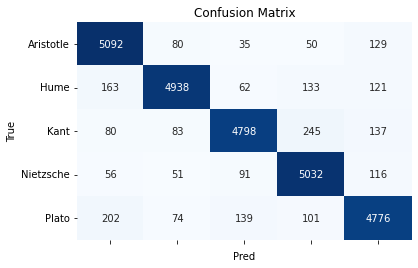

In [ ]:

# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(y_test_sorted, rounded_predictions)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="BI-LSTM Confusion Matrix")
plt.yticks(rotation=0)
plt.show()


### BI-LSTM: Plotting Result to Compare Model Performance on Training & Validation Set

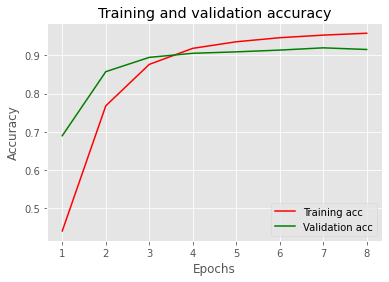

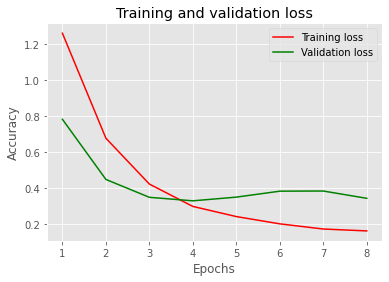

In [ ]:

# Verifying accuracy of training set versus validation set
plt.style.use('ggplot')

%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',  color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b',color='green', label='Validation acc')
plt.title('BI-LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss, 'b',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='green' ,label='Validation loss')
plt.title('BI-LSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.show()

# BI-LSTM: DEPLOYMENT PHASE - PHILOSOPHERS TEXT
## Saving Bi-LSTM model

In [ ]:
# bi_lstm_model1.save("bi-lstm_modelstrat.h5")
# load.model('/content/bi-lstm_model2.h5')

In [ ]:
# Importing the developed Bi-LSTM models

# from tensorflow import keras

# model = keras.models.load_model('/content/bi-lstm_model22.h5')

# CNN MODEL


In [ ]:

# Initialising input variables 

sentences = df_stratified['sentence']

labels = df_stratified['label']


In [ ]:

max_words = 47000 
max_len = 300 #130
tokenize = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenize.fit_on_texts(sentences.values)
# Converting texts to sequences then into a word index
sequences = tokenize.texts_to_sequences(sentences.values)
word_index = tokenize.word_index
print(len(word_index))
# Pading texts to limit the word count
X = pad_sequences(sequences,maxlen=max_len)
y = keras.utils.to_categorical(labels.values,num_classes=5)


40779


In [ ]:

# splitting training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)


In [ ]:
# Defining the number of epochs, embedding dimensions, batch size and vocab length required in the model
epochs = 5
emb_dim = 300 # 130
batch_size = 128
vocab = len(word_index) + 1
MAX_NB_WORDS = 40779
embed_dim = 300
max_seq_len = 300
num_filters = 64 

batch_size = 256 
num_epochs = 8 
weight_decay = 1e-4


In [ ]:
# Checking that training and test set are the same input dims
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))


((74993, 300), (74993, 5), (32141, 300), (32141, 5))


## CNN MODEL ARCHITECTURE & TRAINING

### CNN MODEL 


In [ ]:
# CNN ARCHITECTURE 2
CNN_model2 = Sequential()
CNN_model2.add((Embedding(vocab,emb_dim)))
CNN_model2.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
CNN_model2.add(MaxPooling1D(2))
CNN_model2.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
CNN_model2.add(GlobalMaxPooling1D())
CNN_model2.add(Dropout(0.5))
CNN_model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
CNN_model2.add(Dense(5, activation='softmax')) 

# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
CNN_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         12234000  
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          134464    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          28736     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

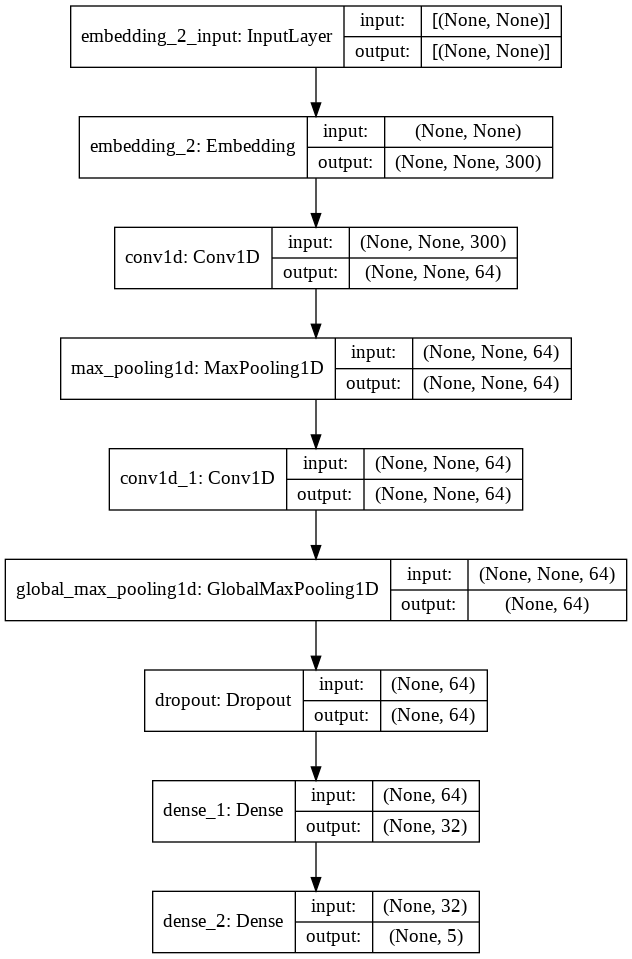

In [ ]:
plot_model(CNN_model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
%%time
# Fitting second CNN model to data
history = model_cnn.fit(X_train, y_train,validation_split=0.2,epochs=epochs, batch_size=batch_size,verbose=2,shuffle=True) 



Epoch 1/15
503/503 - 4s - loss: 0.7526 - accuracy: 0.7168 - val_loss: 0.3517 - val_accuracy: 0.8792
Epoch 2/15
503/503 - 3s - loss: 0.2166 - accuracy: 0.9291 - val_loss: 0.2500 - val_accuracy: 0.9159
Epoch 3/15
503/503 - 3s - loss: 0.0930 - accuracy: 0.9714 - val_loss: 0.2301 - val_accuracy: 0.9278
Epoch 4/15
503/503 - 3s - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.2512 - val_accuracy: 0.9285
Epoch 5/15
503/503 - 3s - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.2922 - val_accuracy: 0.9273
Epoch 6/15
503/503 - 3s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.3005 - val_accuracy: 0.9284
Epoch 7/15
503/503 - 3s - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.3364 - val_accuracy: 0.9263
Epoch 8/15
503/503 - 3s - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.3670 - val_accuracy: 0.9239
Epoch 9/15
503/503 - 3s - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.3710 - val_accuracy: 0.9266
Epoch 10/15
503/503 - 3s - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.3695 - val_accuracy: 0.9256

# CNN: EVALUATION PHASE - PHILOSOPHERS TEXT

## CNN Model Evaluation 


### CNN: Accuracy

In [ ]:

accr = CNN_model2.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


1005/1005 [==============================] - 3s 3ms/step - loss: 0.3803 - accuracy: 0.9195
Test set
  Loss: 0.380
  Accuracy: 0.920


### CNN: Predictions On Test Set

In [ ]:

# CNN model predictions on test set 

predictions = CNN_model2.predict(x= X_test, batch_size = 10, verbose = 2)


3215/3215 - 4s


In [ ]:
# Derive rounded predictions that will shift probability of class into actual prediction

rounded_predictions = np.argmax(predictions,axis=-1)

# Test to verify prediciton outputt after rounding

rounded_predictions

# Derive rounded labels

rounded_labels = np.argmax(y_test,axis=-1)

array([2, 1, 4, ..., 2, 1, 3])

### CNN: Classification Report

In [ ]:
#3. Evaluation for model: SF+ DSWE + CNN

print(f"SF + DSWE + CNN Accuracy: {accuracy_score(rounded_predictions,rounded_labels)}")
print(f"SF + DSWE + CNN F1: {f1_score(rounded_predictions,rounded_labels,average='macro')}")
print(f"SF + DSWE + CNN Recall Score: {recall_score(rounded_predictions,rounded_labels,average='macro')}")
print(f"SF + DSWE + CNN Precision Score: {precision_score(rounded_predictions,rounded_labels,average='macro')}")
print(f"SF + DSWE + CNN Kappa Score: {cohen_kappa_score(rounded_predictions,rounded_labels)}")


SF + DSWE + CNN Accuracy: 0.9195109050745154
SF + DSWE + CNN F1: 0.9194875634313275
SF + DSWE + CNN Recall Score: 0.9201664763886657
SF + DSWE + CNN Precision Score: 0.9194998055812336
SF + DSWE + CNN Kappa Score: 0.8993876078771115


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
# Turning the rounded predictions into a dataframe 
labels_pred = pd.DataFrame(rounded_predictions)
labels_pred.shape
y_test_sorted = np.argmax(y_test,axis=-1)

print("CNN classification Report")                  
print(classification_report(y_test_sorted,rounded_predictions))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5386
           1       0.91      0.94      0.92      5417
           2       0.92      0.91      0.91      5343
           3       0.90      0.95      0.93      5346
           4       0.95      0.87      0.91      5292

    accuracy                           0.92     26784
   macro avg       0.92      0.92      0.92     26784
weighted avg       0.92      0.92      0.92     26784



### CNN: Confusion Matrix

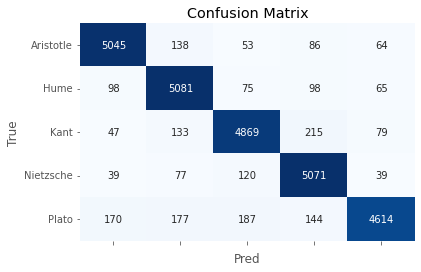

In [ ]:
}
# Generate Confusion Matrix 
cm = confusion_matrix(y_true=y_test_sorted,y_pred=rounded_predictions)


# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(y_test_sorted, rounded_predictions)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="CNN Confusion Matrix")
plt.yticks(rotation=0)
plt.show()

### CNN: Plotting Training & Validation Accuracy and Loss

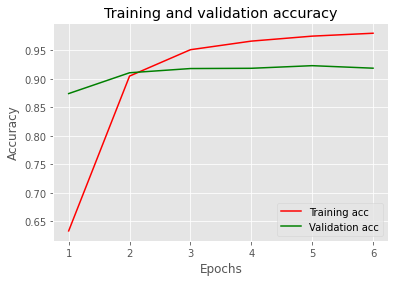

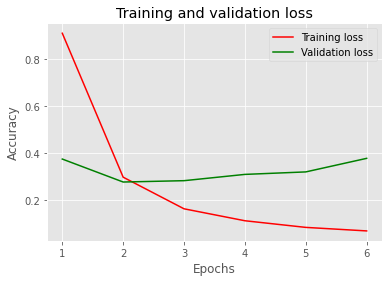

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',  color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b',color='green', label='Validation acc')
plt.title('CNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss, 'b',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='green' ,label='Validation loss')
plt.title('CNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# CNN: DEPLOYMENT PHASE - PHILOSOPHERS TEXT
## Saving CNN model

In [ ]:
# model.save('CNN_noembed.h5')

# GloVe Word Embeddings

In [ ]:
# Importing Data 
sentences = df_stratified.sentence

labels = df_stratified.label

# Set max words for entire vocab and max len for padded sequences 
max_words = 47000 
max_len = 256    

# Text pre-processing libraries 

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# y to categorical

y = keras.utils.to_categorical(labels)

# Instantiate tokenizer 
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# create the vocabulary by fitting on Sentences 
tokenizer.fit_on_texts(sentences)

# generate the sequence of tokens
sent_seq = tokenizer.texts_to_sequences(sentences)

# # pad the sequences
sent_pad = sequence.pad_sequences(sent_seq, maxlen=max_len)

word_index = tokenizer.word_index


# Split data into training and test set. 
X_train, X_test, y_train, y_test = train_test_split(sent_pad, y, test_size=0.25, random_state=42)



In [ ]:

# Print an example of a training sentence 
print('text example:', sentences[1])
# Print an example of a the training sentence as a sequence
print('text sequence:', sent_seq[1])
# Print an example of a padded sequence 
print('text padded:', sent_pad[1])


text example: the presupposition of the moral feeling in man.
text sequence: [1, 4181, 2, 1, 185, 343, 5, 59]
text padded: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0

## Loading GLoVe Embedding

In [ ]:
%%time 
import numpy as np
embedding_vec = {}

with open('/content/drive/MyDrive/data/glove.840B.300d.txt','r',encoding='utf-8') as file: 
  for row in file:
    values = row.split(" ")
    word = values[0]
    weights = np.asarray([float(val) for val in values[1:]])
    embedding_vec[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vec)}")  


# /content/drive/MyDrive/data/glove.6B.100d.txt

Size of vocabulary in GloVe: 2196017
CPU times: user 3min 4s, sys: 8.37 s, total: 3min 13s
Wall time: 3min 13s


In [ ]:
embedding_vec['hello'], embedding_vec['world']

In [ ]:
import string

# Define the Number of Embedding Dimensions
embedding_dimensions = 300 
# 
if max_words is None:
  vocab_len = max_words
else:
  # Set the vocabulary length
  vocab_len = len(word_index) + 1
  # Initialise an Embedding Matrix with 0's the size of the vocabulary
embedding_matrix = np.zeros((vocab_len,embedding_dimensions))
# Set a counter for out-of-vocabulary words
oov_counter = 0
# Create a list containing out-of-vocabulary 
oov_words = []
# for each word and index position in the total set of items
for word, idx in word_index.items():
# if the index is less than the vocabulary length
  if idx < vocab_len:
    # get the word from the previously initialised GloVe Embedding
    embedding_vector = embedding_vec.get(word)
    # Assign if the contents are not equivalent to a None value
    if embedding_vector is not None:
      # 
      embedding_matrix[idx] = embedding_vector
      # Count the out-of-vocabulary content and append the word not contained in the embedding matrix to the list
    else:
      oov_counter += 1
      oov_words.append(word)


In [ ]:
# Print 20 out of words from the list of oov items 
print(f'Some out of vocabulary words: {oov_words[0:20]}')
# Print the out of words count and the vocabulary count for comparison
print(f'{oov_counter} out of {vocab_len} words were OOV.')


Some out of vocabulary words: ['protagoras', 'cebes', 'simmias', 'crito', 'apollonian', 'cleinias', 'wagners', 'lacedaemonians', 'agathon', 'ftus', 'theaetetus', 'choiceworthy', 'nietzsches', 'gorgias', 'lacedaemon', 'hellenes', 'sophagus', 'glaucon', 'prodicus', 'callicles']
10100 out of 40780 words were OOV.


## LSTM: GLOVE WORD EMBEDDING MODEL ARCHITECTURE AND TRAINING.

In [ ]:

# Model layers
glove_lstm_model = Sequential()

glove_lstm_model.add(Embedding(vocab_len, embedding_dimensions, trainable = False, weights=[embedding_matrix]))
glove_lstm_model.add(SpatialDropout1D(0.5)) ## different dropout options = 0.2, 0.8, 0.7
glove_lstm_model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
glove_lstm_model.add(Dense(5, activation='softmax'))

# Model Compiler
glove_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Model Summary
print(glove_lstm_model.summary())


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, None, 300)         12234000  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, None, 300)         0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_47 (Dense)             (None, 5)                 325       
Total params: 12,327,765
Trainable params: 93,765
Non-trainable params: 12,234,000
_________________________________________________________________
None


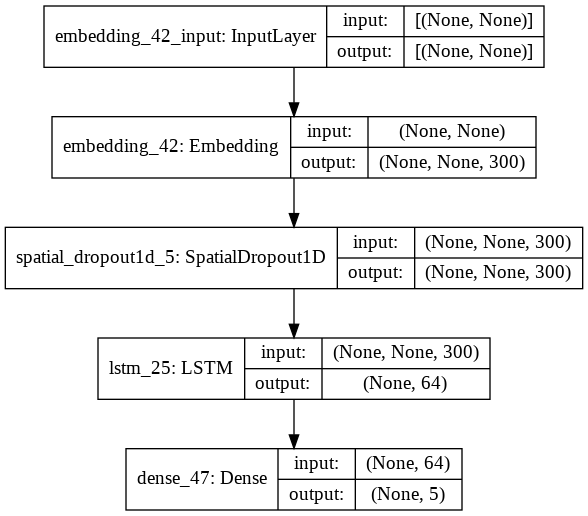

In [ ]:
plot_model(glove_lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
%time

history = glove_lstm_model.fit(X_train, y_train, epochs=25, batch_size=256,validation_split=0.2
                    ,callbacks=[EarlyStopping(monitor='val_loss',patience=4, min_delta=0.01)],shuffle=True)



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
Epoch 1/25
252/252 [==============================] - 214s 842ms/step - loss: 1.1642 - acc: 0.5432 - val_loss: 0.8975 - val_acc: 0.6620
Epoch 2/25
252/252 [==============================] - 214s 849ms/step - loss: 0.9320 - acc: 0.6478 - val_loss: 0.7538 - val_acc: 0.7165
Epoch 3/25
252/252 [==============================] - 214s 848ms/step - loss: 0.8534 - acc: 0.6795 - val_loss: 0.6926 - val_acc: 0.7407
Epoch 4/25
252/252 [==============================] - 212s 842ms/step - loss: 0.8045 - acc: 0.7001 - val_loss: 0.6536 - val_acc: 0.7548
Epoch 5/25
252/252 [==============================] - 216s 856ms/step - loss: 0.7740 - acc: 0.7113 - val_loss: 0.6251 - val_acc: 0.7683
Epoch 6/25
252/252 [==============================] - 214s 849ms/step - loss: 0.7453 - acc: 0.7228 - val_loss: 0.6134 - val_acc: 0.7705
Epoch 7/25
252/252 [==============================] - 214s 848ms/step - loss: 0.7263 - acc: 0.7289 - val_loss: 0.5780 - 

In [ ]:
glove_lstm_model.evaluate(X_test,y_test,verbose=1)

837/837 - 60s - loss: 0.4951 - acc: 0.8207


[0.4951137602329254, 0.8206765055656433]

In [ ]:
#4. Evaluation for model: SF+ GloVe + LSTM

print(f"SF + GloVe + LSTM Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + GloVe + LSTM F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + LSTM Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + LSTM Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + LSTM Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


## BI-LSTM: GLOVE WORD EMBEDDING MODEL ARCHITECTURE AND TRAINING.

In [ ]:

# Model Architecture 1

glove_bi_lstm_model= Sequential()
glove_bi_lstm_model.add(Dense(512, input_dim=256, activation='relu'))
glove_bi_lstm_model.add(Embedding(vocab_len, embedding_dimensions, trainable = False, weights=[embedding_matrix]))
glove_bi_lstm_model.add(Dropout(0.5)) 
glove_bi_lstm_model.add(Bidirectional(LSTM(emb_dim)))
glove_bi_lstm_model.add(Dense(5,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=3e-4)

glove_bi_lstm_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

glove_bi_lstm_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
embedding_29 (Embedding)     (None, 512, 100)          4078100   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512, 100)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 600)               962400    
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 3005      
Total params: 5,175,089
Trainable params: 1,096,989
Non-trainable params: 4,078,100
_________________________________________________________________


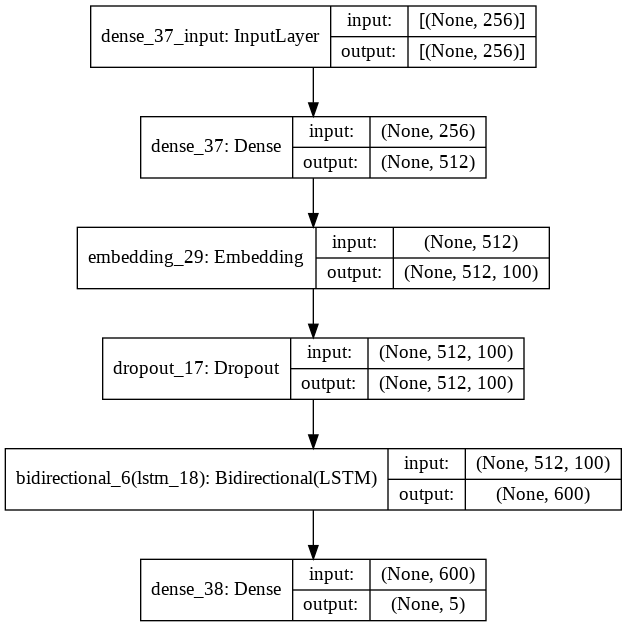

In [ ]:
plot_model(glove_bi_lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
%%time

history = glove_bi_lstm_model.fit(X_train, y_train, epochs=15, batch_size=256,validation_split=0.2
                    ,callbacks=[EarlyStopping(monitor='val_loss',patience=4, min_delta=0.01)],shuffle=True)



Epoch 1/50
252/252 [==============================] - 97s 373ms/step - loss: 1.5569 - accuracy: 0.2827 - val_loss: 1.5460 - val_accuracy: 0.2942
Epoch 2/50
252/252 [==============================] - 93s 370ms/step - loss: 1.5350 - accuracy: 0.3096 - val_loss: 1.5539 - val_accuracy: 0.3076
Epoch 3/50
252/252 [==============================] - 93s 370ms/step - loss: 1.5288 - accuracy: 0.3126 - val_loss: 1.5349 - val_accuracy: 0.3181
Epoch 4/50
252/252 [==============================] - 93s 370ms/step - loss: 1.5235 - accuracy: 0.3202 - val_loss: 1.5563 - val_accuracy: 0.2923
Epoch 5/50
252/252 [==============================] - 93s 370ms/step - loss: 1.5179 - accuracy: 0.3220 - val_loss: 1.5265 - val_accuracy: 0.3203
Epoch 6/50
252/252 [==============================] - 93s 370ms/step - loss: 1.5128 - accuracy: 0.3276 - val_loss: 1.5200 - val_accuracy: 0.3231
Epoch 7/50
252/252 [==============================] - 93s 370ms/step - loss: 1.5098 - accuracy: 0.3311 - val_loss: 1.5273 - val_ac

In [ ]:
# BI-LSTM
predictions = glove_bi_lstm_model.predict(X_test)

predictions = np.argmax(predictions,axis=-1)

# np.argmax(predictions,axis=-1)
recon_y_test = np.argmax(y_test,axis=-1)

recon_y_test

array([2, 1, 4, ..., 4, 2, 0])

In [ ]:
#5. Evaluation for model: SF+ GloVe + BI-LSTM

print(f"SF + GloVe + BI-LSTM Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + GloVe + BI-LSTM F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + BI-LSTM Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + BI-LSTM Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + BI-LSTM Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


In [ ]:
print(classification_report(predictions,recon_y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5457
           1       0.90      0.94      0.92      5188
           2       0.94      0.89      0.92      5596
           3       0.93      0.93      0.93      5342
           4       0.90      0.92      0.91      5201

    accuracy                           0.92     26784
   macro avg       0.92      0.92      0.92     26784
weighted avg       0.92      0.92      0.92     26784



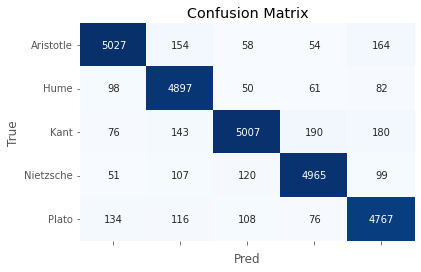

In [ ]:

# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(predictions, recon_y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',  color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b',color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss, 'b',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='green' ,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## CNN: GLOVE WORD EMBEDDING MODEL ARCHITECTURE AND TRAINING.

In [ ]:
# CNN ARCHITECTURE 2
Glove_CNN_model = Sequential()
Glove_CNN_model.add(Embedding(vocab_len, embedding_dimensions, trainable = False, weights=[embedding_matrix]))
Glove_CNN_model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
Glove_CNN_model.add(MaxPooling1D(2))
Glove_CNN_model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
Glove_CNN_model.add(GlobalMaxPooling1D())
Glove_CNN_model.add(Dropout(0.5))
Glove_CNN_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
Glove_CNN_model.add(Dense(5, activation='softmax')) 

# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
Glove_CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Glove_CNN_model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, None, 300)         12234000  
_________________________________________________________________
conv1d_14 (Conv1D)           (None, None, 64)          134464    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, None, 64)          28736     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)              

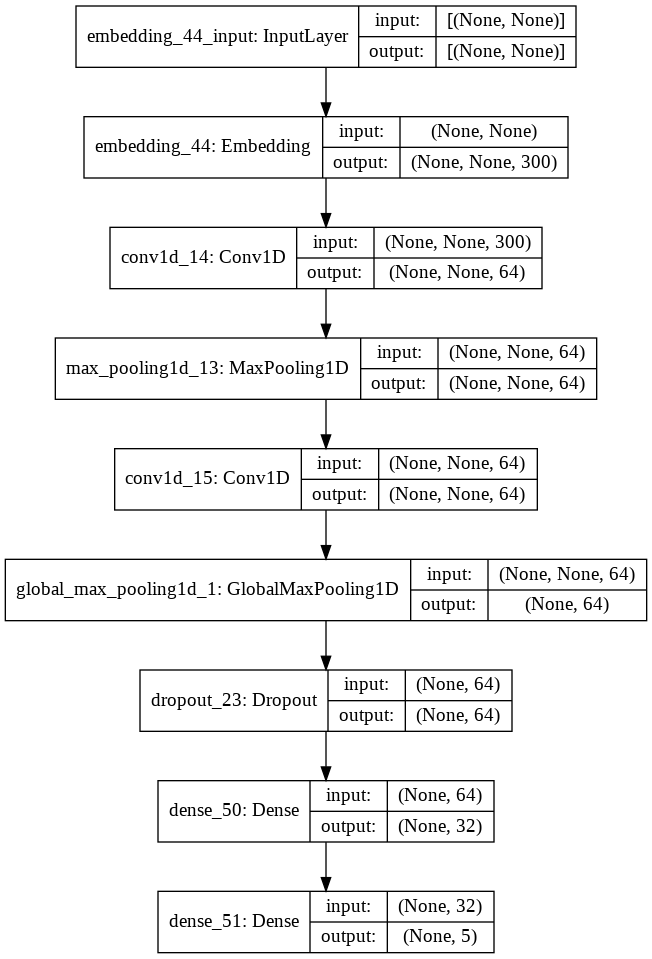

In [ ]:
plot_model(Glove_CNN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

history = Glove_CNN_model.fit(X_train, y_train, epochs=25, batch_size=256,validation_split=0.2
                    ,callbacks=[EarlyStopping(monitor='val_loss',patience=4, min_delta=0.01)],shuffle=True)



Epoch 1/25
252/252 [==============================] - 7s 25ms/step - loss: 0.9664 - accuracy: 0.6334 - val_loss: 0.7113 - val_accuracy: 0.7393
Epoch 2/25
252/252 [==============================] - 6s 25ms/step - loss: 0.6602 - accuracy: 0.7646 - val_loss: 0.5833 - val_accuracy: 0.7889
Epoch 3/25
252/252 [==============================] - 6s 25ms/step - loss: 0.5426 - accuracy: 0.8103 - val_loss: 0.4803 - val_accuracy: 0.8333
Epoch 4/25
252/252 [==============================] - 6s 25ms/step - loss: 0.4568 - accuracy: 0.8426 - val_loss: 0.4453 - val_accuracy: 0.8464
Epoch 5/25
252/252 [==============================] - 6s 25ms/step - loss: 0.3901 - accuracy: 0.8660 - val_loss: 0.5477 - val_accuracy: 0.8114
Epoch 6/25
252/252 [==============================] - 6s 25ms/step - loss: 0.3388 - accuracy: 0.8849 - val_loss: 0.4615 - val_accuracy: 0.8500
Epoch 7/25
252/252 [==============================] - 6s 25ms/step - loss: 0.2887 - accuracy: 0.9037 - val_loss: 0.4067 - val_accuracy: 0.8676

In [ ]:
# Predictions
predictions = CNN_model2.predict(X_test)

predictions = np.argmax(predictions,axis=-1)

# np.argmax(predictions,axis=-1)
recon_y_test = np.argmax(y_test,axis=-1)

recon_y_test

array([2, 1, 4, ..., 4, 2, 0])

In [ ]:

cm = confusion_matrix(predictions,recon_y_test)

print(accuracy_score(predictions,recon_y_test))

print(cohen_kappa_score(predictions,recon_y_test))


0.9208109318996416
0.9010137133754176


In [ ]:
#6. Evaluation for model: SF+ GloVe + CNN

print(f"SF + GloVe + CNN Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + GloVe + CNN F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + CNN Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + CNN Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + GloVe + CNN Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


In [ ]:
print(classification_report(predictions,recon_y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5457
           1       0.90      0.94      0.92      5188
           2       0.94      0.89      0.92      5596
           3       0.93      0.93      0.93      5342
           4       0.90      0.92      0.91      5201

    accuracy                           0.92     26784
   macro avg       0.92      0.92      0.92     26784
weighted avg       0.92      0.92      0.92     26784



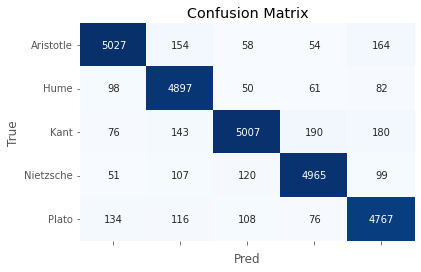

In [ ]:

# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(predictions, recon_y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',  color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b',color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, loss, 'b',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='green' ,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# FastText Word Embeddings

In [ ]:
# Keras tokenizer

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# Importing tokenizers, sequences and padding for text wrangling
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from keras import utils

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences
# Importing and fitting tokenizer
from keras.preprocessing.text import Tokenizer
#
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from sklearn.metrics import classification_report,cohen_kappa_score,accuracy_score,confusion_matrix


In [ ]:
sentences = df_stratified.sentence.values
labels = df_stratified.label.values 

In [ ]:


tokenize = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenize.fit_on_texts(sentences)
# # Converting texts to sequences then into a word index
sequences = tokenize.texts_to_sequences(sentences)
word_index = tokenize.word_index
print(len(word_index))
# Pading texts to limit the word count
X = pad_sequences(sequences,maxlen=max_len)
y = keras.utils.to_categorical(labels,num_classes=5)



40779


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Loading FastText Embeddings

In [ ]:
embeddings_index = {}
f = codecs.open('/content/drive/MyDrive/data/wiki-news-300d-1M.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

999995it [01:25, 11733.31it/s]

found 999995 word vectors


In [ ]:
MAX_NB_WORDS = 40779
embed_dim = 300
max_seq_len = 256
num_filters = 64 

batch_size = 256 
num_epochs = 8 
weight_decay = 1e-4

In [ ]:

# Initialise out-of-vocabulary words 
oov = []
nb_words = min(MAX_NB_WORDS, len(word_index))
# Initialise Embedding Matrix the Size of the Corpus and the Shape of the Shape WE dimensions 
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index are stored as all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
      # Save all oov vocabulary to the oov list 
        oov.append(word)
        #Print all the number of words that did not have coefficients
print('number of out of word vocabulary in embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of out of word vocabulary in embeddings: 11757


In [ ]:
print("sample words not found: ", np.random.choice(words_not_found, 20))

sample words not found:  ['halcyonic' 'bedaubed' 'nicias' 'cnacula' 'tainteth' 'sooths'
 'historicalas' 'tributathat' 'reprehensions' 'chelon' 'palamedes'
 'actionwas' 'elementology' 'understandingwe' 'historyin' 'saxatile'
 'tempteth' 'capria' 'wifeproperty' 'unsociableness' 'annandale' 'calig'
 'somersets' 'inspireth' 'phryne' 'ginni' 'falsethat' 'hoarsenessevery'
 'manufacturedverily' 'experienceeither' 'predicatesi' 'motherthat'
 'scilla' 'itbrought' 'schopenhauer' 'alopece' 'objectionableness'
 'devereux' 'waleran' 'helotes' 'forwardin' 'sensuousin' 'pezenas'
 'rabbinism' 'thouremain' 'seventeenthere' 'dayultimately' 'tragdi'
 'sulker' 'movedmotion']


## CNN: FastText WORD EMBEDDING Model Training and Validation Accuracy  

In [ ]:
#CNN architecture

fastText_CNN_model = Sequential()
fastText_CNN_model.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
fastText_CNN_model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
fastText_CNN_model.add(MaxPooling1D(2))
fastText_CNN_model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
fastText_CNN_model.add(GlobalMaxPooling1D())
fastText_CNN_model.add(Dropout(0.5))
fastText_CNN_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
fastText_CNN_model.add(Dense(5, activation='softmax')) 

# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
fastText_CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fastText_CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 300)          12233700  
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 300, 64)           134464    
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 150, 64)           0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 150, 64)           28736     
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 64)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)              

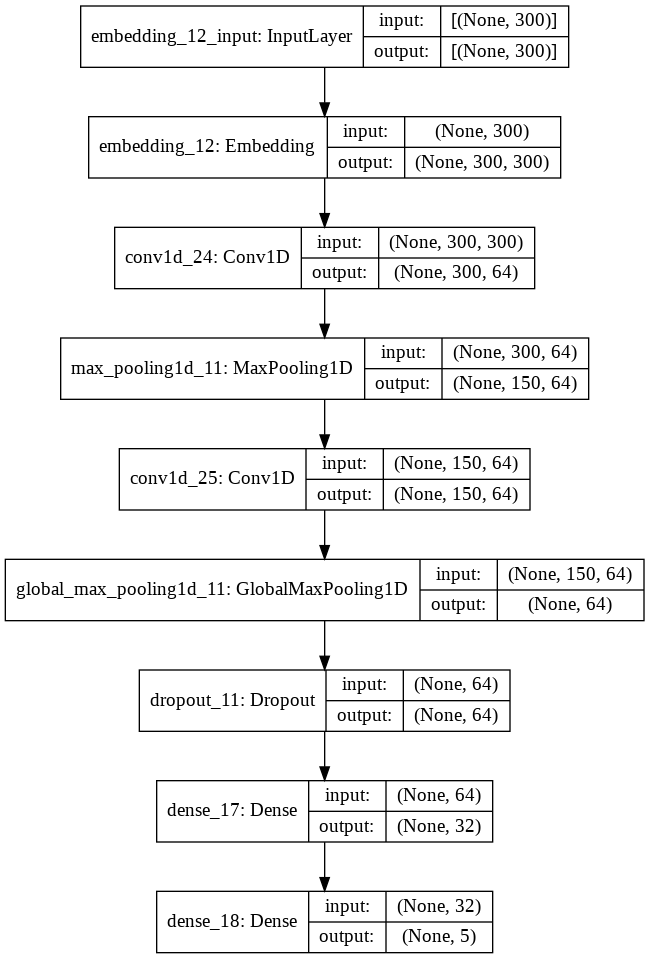

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list =[early_stopping]

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=15,callbacks = callbacks_list  ,validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/15


283/283 - 4s - loss: 0.9396 - accuracy: 0.6439 - val_loss: 0.6299 - val_accuracy: 0.7664
Epoch 2/15
283/283 - 3s - loss: 0.6257 - accuracy: 0.7791 - val_loss: 0.5253 - val_accuracy: 0.8127
Epoch 3/15
283/283 - 3s - loss: 0.5079 - accuracy: 0.8260 - val_loss: 0.4443 - val_accuracy: 0.8418
Epoch 4/15
283/283 - 3s - loss: 0.4120 - accuracy: 0.8603 - val_loss: 0.3888 - val_accuracy: 0.8675
Epoch 5/15
283/283 - 3s - loss: 0.3352 - accuracy: 0.8899 - val_loss: 0.3527 - val_accuracy: 0.8850
Epoch 6/15
283/283 - 3s - loss: 0.2729 - accuracy: 0.9112 - val_loss: 0.3190 - val_accuracy: 0.8996
Epoch 7/15
283/283 - 3s - loss: 0.2180 - accuracy: 0.9302 - val_loss: 0.3746 - val_accuracy: 0.8835
Epoch 8/15
283/283 - 3s - loss: 0.1908 - accuracy: 0.9392 - val_loss: 0.3126 - val_accuracy: 0.9068
Epoch 9/15
283/283 - 3s - loss: 0.1588 - accuracy: 0.9499 - val_loss: 0.3128 - val_accuracy: 0.9101
Epoch 10/15
283/283 - 3s - loss: 0.1387 - accuracy: 0.9563 - val_loss: 0.3135 - val_accuracy: 0.9147
Epoch 0001

In [ ]:
predictions = model.predict(X_test)

rounded_predictions = np.argmax(predictions,axis=-1)

rounded_predictions

rounded= np.argmax(y_test,axis=-1)
rounded

array([2, 1, 4, ..., 4, 2, 0])

In [ ]:
# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(predictions, recon_y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)
plt.show()

[[4924  107   48   36  113]
 [ 205 5028  155  127  118]
 [  36   70 4637   68  107]
 [  51   91  279 5041   80]
 [ 170  121  224   74 4874]]


In [ ]:
#7. Evaluation for model: SF+ FastText + CNN

print(f"SF + FastText + CNN Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + FastText + CNN F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + CNN Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + CNN Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + CNN Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


In [ ]:

print(classification_report(rounded_predictions,rounded))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5228
           1       0.93      0.89      0.91      5633
           2       0.87      0.94      0.90      4918
           3       0.94      0.91      0.93      5542
           4       0.92      0.89      0.91      5463

    accuracy                           0.91     26784
   macro avg       0.91      0.92      0.91     26784
weighted avg       0.92      0.91      0.91     26784



In [ ]:
print(cohen_kappa_score(rounded_predictions,rounded))
print(accuracy_score(rounded_predictions,rounded))

0.893591328471948
0.9148745519713262


In [ ]:
acc = model.evaluate(X_test,verbose=False,batch_size=10)


print("Test Accuracy: {:.4f}".format(acc))

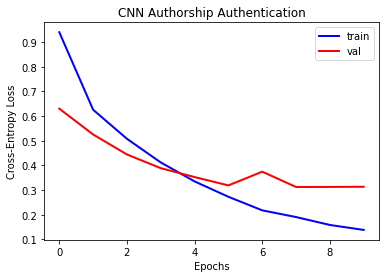

In [ ]:
#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN Authorship Authentication')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

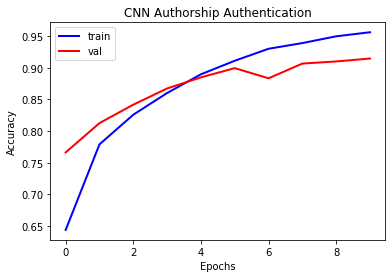

In [ ]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('CNN Authorship Authentication')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

## LSTM: FastText WORD EMBEDDING Model Training and Validation Accuracy  

In [ ]:

# LSTM FastText Model Arhcitecture  
lstm_model = Sequential()
lstm_model.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
lstm_model.add(SpatialDropout1D(0.5)) 
lstm_model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.7))
lstm_model.add(Dense(5, activation='softmax'))

# Compile Model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Model Summary
print(lstm_model.summary())



Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 300, 300)          12233700  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 300)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 325       
Total params: 12,327,465
Trainable params: 93,765
Non-trainable params: 12,233,700
_________________________________________________________________
None


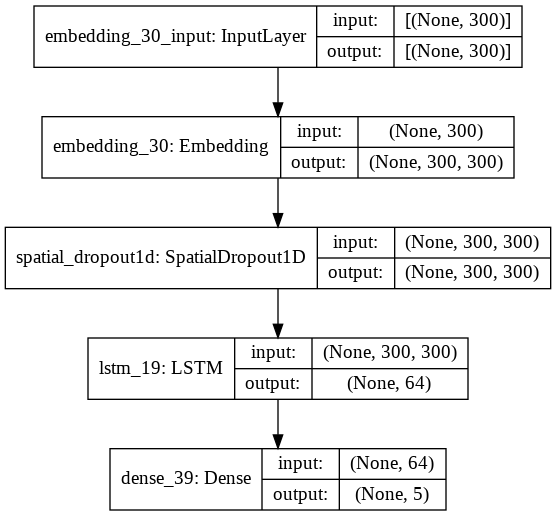

In [ ]:
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
hist = lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=15,callbacks = callbacks_list  ,validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/15
283/283 - 234s - loss: 1.1773 - acc: 0.5391 - val_loss: 0.8418 - val_acc: 0.6978
Epoch 2/15
283/283 - 231s - loss: 0.9982 - acc: 0.6222 - val_loss: 0.7756 - val_acc: 0.7208
Epoch 3/15
283/283 - 229s - loss: 0.9440 - acc: 0.6412 - val_loss: 0.7404 - val_acc: 0.7322
Epoch 4/15
283/283 - 229s - loss: 0.9035 - acc: 0.6591 - val_loss: 0.7055 - val_acc: 0.7429
Epoch 5/15
283/283 - 229s - loss: 0.8693 - acc: 0.6701 - val_loss: 0.6758 - val_acc: 0.7559
Epoch 6/15
283/283 - 232s - loss: 0.8363 - acc: 0.6841 - val_loss: 0.6435 - val_acc: 0.7674
Epoch 7/15
283/283 - 233s - loss: 0.8111 - acc: 0.6942 - val_loss: 0.6338 - val_acc: 0.7628
Epoch 8/15
283/283 - 229s - loss: 0.7857 - acc: 0.7050 - val_loss: 0.6076 - val_acc: 0.7815
Epoch 9/15
283/283 - 233s - loss: 0.7628 - acc: 0.7131 - val_loss: 0.5996 - val_acc: 0.7765
Epoch 10/15
283/283 - 233s - loss: 0.7489 - acc: 0.7180 - val_loss: 0.5803 - val_acc: 0.7882
Epoch 11/15
283/283 - 231s - loss: 0.7368 - acc: 0.7223 - val_loss: 0.5609 - va

In [ ]:

accr = lstm_model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.4f}\n  Accuracy: {:0.4f}'.format(accr[0],accr[1]))


837/837 [==============================] - 60s 71ms/step - loss: 0.5485 - acc: 0.7990
Test set
  Loss: 0.5485
  Accuracy: 0.7990


In [ ]:
predictions = model.predict(X_test)

rounded_predictions = np.argmax(predictions,axis=-1)

rounded_predictions

rounded= np.argmax(y_test,axis=-1)
rounded

array([2, 1, 4, ..., 4, 2, 0])

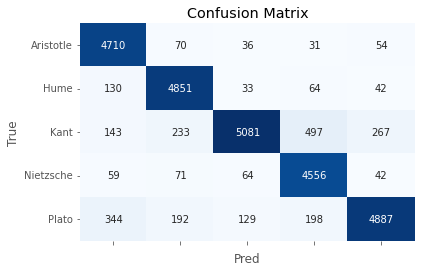

In [ ]:
philo_list = ['Kant', 'Hume', 'Plato', 'Aristotle','Nietzsche']
# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(rounded_predictions, rounded)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)
plt.show()

In [ ]:
#8. Evaluation for model: SF+ FastText + LSTM

print(f"SF + FastText + LSTM Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + FastText + LSTM F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + LSTM Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + LSTM Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + LSTM Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


In [ ]:

print(classification_report(rounded_predictions,rounded))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      4901
           1       0.90      0.95      0.92      5120
           2       0.95      0.82      0.88      6221
           3       0.85      0.95      0.90      4792
           4       0.92      0.85      0.89      5750

    accuracy                           0.90     26784
   macro avg       0.90      0.91      0.90     26784
weighted avg       0.90      0.90      0.90     26784



In [ ]:
print(cohen_kappa_score(rounded_predictions,rounded))
print(accuracy_score(rounded_predictions,rounded))

0.874051524692721
0.8992308841099164


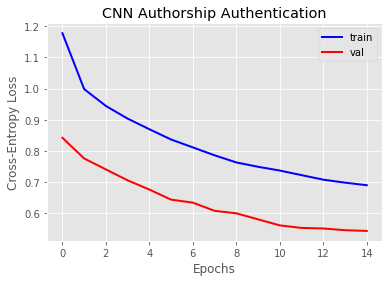

In [ ]:
#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM Authorship Authentication')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

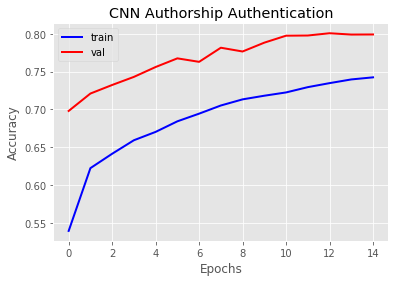

In [ ]:
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('LSTM Authorship Authentication')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

## BI-LSTM: FastText WORD EMBEDDING Model Training and Validation Accuracy  

In [ ]:

# BI-LSTM FastText Model Arhcitecture 

model_bi_lstm = Sequential()

model_bi_lstm.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
model_bi_lstm.add(SpatialDropout1D(0.3))
model_bi_lstm.add(Bidirectional(LSTM(emb_dim, dropout=0.3, recurrent_dropout=0.3)))
model_bi_lstm.add(Dense(emb_dim, activation='relu'))
model_bi_lstm.add(Dropout(0.8))
model_bi_lstm.add(Dense(emb_dim, activation='relu')) 
model_bi_lstm.add(Dropout(0.8))
model_bi_lstm.add(Dense(5,activation='softmax'))
model_bi_lstm.summary()
model_bi_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 300, 300)          12233700  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 300, 300)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dense_41 (Dense)             (None, 300)               180300    
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_20 (Dropout)         (None, 300)             

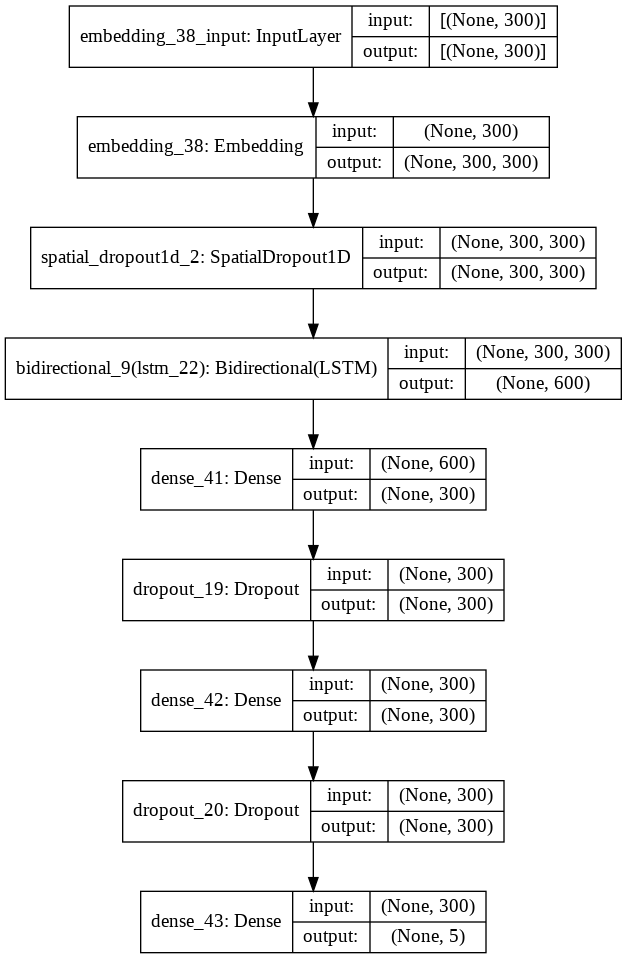

In [ ]:
plot_model(model_bi_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
hist = model_bi_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=15,callbacks = callbacks_list  ,validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/15
283/283 - 457s - loss: 1.1936 - accuracy: 0.5247 - val_loss: 0.7970 - val_accuracy: 0.7195
Epoch 2/15
283/283 - 453s - loss: 0.9430 - accuracy: 0.6621 - val_loss: 0.7143 - val_accuracy: 0.7491
Epoch 3/15
283/283 - 456s - loss: 0.8580 - accuracy: 0.6936 - val_loss: 0.6550 - val_accuracy: 0.7746
Epoch 4/15
283/283 - 459s - loss: 0.8019 - accuracy: 0.7166 - val_loss: 0.5955 - val_accuracy: 0.7888
Epoch 5/15
283/283 - 453s - loss: 0.7584 - accuracy: 0.7326 - val_loss: 0.5802 - val_accuracy: 0.7935
Epoch 6/15
283/283 - 456s - loss: 0.7177 - accuracy: 0.7494 - val_loss: 0.5468 - val_accuracy: 0.8035
Epoch 7/15
283/283 - 459s - loss: 0.6733 - accuracy: 0.7638 - val_loss: 0.5041 - val_accuracy: 0.8174
Epoch 8/15
283/283 - 458s - loss: 0.6420 - accuracy: 0.7775 - val_loss: 0.4816 - val_accuracy: 0.8287
Epoch 9/15
283/283 - 454s - loss: 0.6092 - accuracy: 0.7887 - val_loss: 0.4617 - val_accuracy: 0.8289
Epoch 10/15
283/283 - 459s - loss: 0.5836 - accuracy: 0.7973 - val_loss: 0.4594 - 

In [ ]:
acc = model_bi_lstm.evaluate(X_test,verbose=False,batch_size=10)


print("Test Accuracy: {:.4f}".format(acc))

In [ ]:
predictions = model.predict(X_test)

rounded_predictions = np.argmax(predictions,axis=-1)

rounded_predictions

rounded= np.argmax(y_test,axis=-1)
rounded

array([2, 1, 4, ..., 4, 2, 0])

BI-LSTM FASTTEXT MODEL


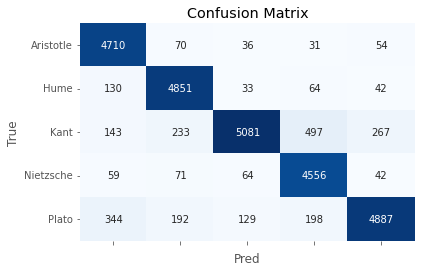

In [ ]:

# Initialise class names 
classes = np.unique(philo_list)

# Display Confusion Matrix using Matplotlib
print("BI-LSTM FASTTEXT MODEL")
cm = confusion_matrix(rounded_predictions, rounded)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="BI-LSTM Confusion Matrix")
plt.yticks(rotation=0)
plt.show()

In [ ]:

print(classification_report(rounded_predictions,rounded))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      4901
           1       0.90      0.95      0.92      5120
           2       0.95      0.82      0.88      6221
           3       0.85      0.95      0.90      4792
           4       0.92      0.85      0.89      5750

    accuracy                           0.90     26784
   macro avg       0.90      0.91      0.90     26784
weighted avg       0.90      0.90      0.90     26784



In [ ]:
#9. Evaluation for model: SF+ FastText + BI-LSTM

print(f"SF + FastText + BI-LSTM Accuracy: {accuracy_score(rounded_predictions,y_test)}")
print(f"SF + FastText + BI-LSTM F1: {f1_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + BI-LSTM Recall Score: {recall_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + BI-LSTM Precision Score: {precision_score(rounded_predictions,y_test,average='macro')}")
print(f"SF + FastText + BI-LSTM Kappa Score: {cohen_kappa_score(rounded_predictions,y_test)}")


In [ ]:
print(cohen_kappa_score(rounded_predictions,rounded))
print(accuracy_score(rounded_predictions,rounded))

0.874051524692721
0.8992308841099164


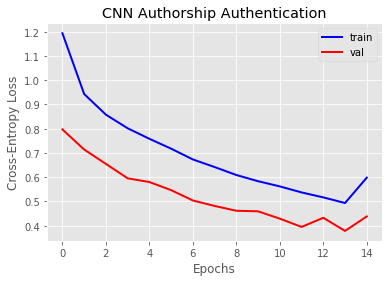

In [ ]:
#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('BI-LSTM Authorship Authentication')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

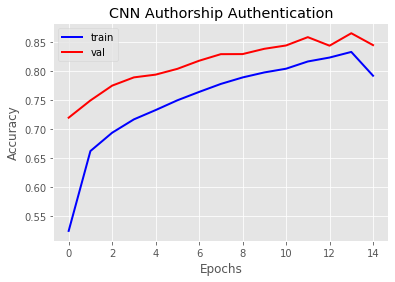

In [ ]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('BI-LSTM Authorship Authentication')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Testing Models On New Sentences from Authors

In [ ]:
n_sent = "whatever it is you do, do nothing i would not do"

n_sent

In [ ]:

#  generate the sequence of tokens
sent_seq = tokenizer.texts_to_sequences(n_sent)

# pad the sequences
sent_pad = sequence.pad_sequences(sent_seq, maxlen=max_len)

In [ ]:
# Shift Model to Test How Difference Models Perform on New Data
prediction = model_bi_lstm.predict(sent_pad)
pre = np.argmax(prediction,axis=-1)

print(pre,philo_list[np.argmax(pre,axis=-1)])

[4 4 4 4 4 2 3 2 2 4 4 4 4 2 2 3 4 3 4 4 2 2 4 4 4 4 4 4 3 4 4 4 2 2 4 4 4
 4 4 2 4 4 4 2 2 4 2 4 4 4 3 2 4 3 2 2 4 4 4 4 2 4 2 4 3 4 2] Kant


In [ ]:
def decode(text):
  return " ".join([reverse_word_index.get(i,'?') for i in text])

In [ ]:
reverse_word_index = dict([value,key]for (key,value) in word_index.items())

reverse_word_index